In [3]:
path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"
img1 = r"C:\Users\ayush\Desktop\Jump Rope Code\JupyterEnvironment\jump.png"

## This Link would help identify the center and moments of the longest continuous contours 

https://stackoverflow.com/questions/64249918/how-to-detect-pixel-location-of-object-given-mask-opencv-python
    

In [3]:
### finidng the longest continuous contours in a window by finindg the absolute difference of frames and
### tracking the center of the given contours


In [2]:
'''
tracking the wrist and have them in a frame
get to see the difference image formed within these windows

'''

path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"


## Imports 
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2
import time
import random
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []
left_wrist_y = []
left_wrist_x = []
right_wrist_x = []
right_wrist_y = []
differenc_wrist_r = []
difference_ankle_r = []
left_foot_y = []
right_foot_y = []
left_heel_y = []
right_heel_y = []


cap = cv2.VideoCapture(path)

if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        # Recolor image to RGB
       
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)            
            right_hip_y.append(landmarks[23].y)            
            left_hip_y.append(landmarks[24].y)
            left_wrist_y.append(landmarks[15].y)
            left_wrist_x.append(landmarks[15].x)
            right_wrist_y.append(landmarks[16].y)
            right_wrist_x.append(landmarks[16].x)
            left_heel_y.append(landmarks[29].y)
            right_heel_y.append(landmarks[30].y)
            left_foot_y.append(landmarks[31].y)
            right_foot_y.append(landmarks[32].y)
            
        except:
            pass


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               

    ###obtaining the right and left hand positions and subsequently marking them on the video feed.
    
        right_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]
        left_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST]
        
    
        
        
        # If left wrist landmark is detected, draw the bounding rectangle around it
        if left_wrist.visibility > 0:
            left_wrist_x = int(left_wrist.x * frame.shape[1])
            left_wrist_y = int(left_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (left_wrist_x - 30, left_wrist_y - 30),
                          (left_wrist_x + 40, left_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi1 = frame[left_wrist_y - 30:left_wrist_y + 30, left_wrist_x - 30:left_wrist_x + 40]
            except : 
                roi1 = frame[200:280,200:280]


            ##If right wrist landmark is detected, draw the bounding rectangle around it
        if right_wrist.visibility > 0:
            right_wrist_x = int(right_wrist.x * frame.shape[1])
            right_wrist_y = int(right_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (right_wrist_x - 40, right_wrist_y - 30),
                          (right_wrist_x + 30 , right_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi2 = frame[right_wrist_y - 30:right_wrist_y + 30, right_wrist_x - 30:right_wrist_x + 30]
            except: 
                roi2 = frame[200:280,200:280]

        
        counter = 0 
        

        # Initialize a variable to keep track of the minimum value seen so far
        min_value = None

        # Get the first reading from the sensor
        readings = left_ankle_y

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
            if current_reading < previous_reading and (min_value is None or current_reading < min_value):
                min_value = current_reading

            # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
            elif min_value is not None:
                counter += 1
                min_value = None

#### finding difference of frames and showing them below in new windwos
    
        
        


#         # Initialize the plot
#         plt.ion()  # Turn on interactive mode
#         fig, ax = plt.subplots()
#         line, = ax.plot([], [], 'b-')
#         ax.set_xlim(0, 10)
#         ax.set_ylim(0, 100)
#         ax.set_xlabel('Time')
#         ax.set_ylabel('Sensor Data')
#         fig.canvas.draw()

#         # Initialize the sensor data
#         sensor_data = left_ankle_y
        
#         # Main loop
#         while True:
#             # Update the plot
#             line.set_xdata(range(len(sensor_data)))
#             line.set_ydata(sensor_data)
#             ax.relim()
#             ax.autoscale_view()
#             fig.canvas.draw()
#             fig.canvas.flush_events()

#             #Wait for a short amount of time before updating again
#             time.sleep(0.1)

        cv2.imshow('Mediapipe Feed', image)
        cv2.imshow("RightWristCam", roi1)
        cv2.imshow("LeftWristCam",roi2)
        
        
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
                
        if ret ==False:
            break
        
    print(f"the final counter reading is : {counter}") 
    cap.release()
    cv2.destroyAllWindows()

the final counter reading is : 15


In [70]:
##### IMPORTANT AND WORKING 

"""
This code gives difference images in a box and working impottant, work with this 


"""




import cv2

# Define the coordinates of the window
x,y,w,h = 320,325,75,75
# x,y,w,h = 315,105,75,75

# Open the video capture object and read the first frame
cap = cv2.VideoCapture(path)
ret, frame1 = cap.read()

# Convert the frame to grayscale and apply a Gaussian blur
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray1 = cv2.GaussianBlur(gray1, (5, 5), 0)

# Loop over the frames
while True:
    # Read the current frame
    ret, frame2 = cap.read()

    # Convert the frame to grayscale and apply a Gaussian blur
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.GaussianBlur(gray2, (5, 5), 0)

    # Compute the absolute difference between the two frames
    diff = cv2.absdiff(gray1, gray2)

    # Apply a threshold to the difference image
    thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)[1]
    # Apply a morphological operators and thresholding that 
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CROSS , kernel)
        
    
    # Draw a rectangle around the window
    cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the original video feed and the difference image
    cv2.imshow("Original", frame2)
    cv2.imshow("Difference",diff[y:y+h,x:x+w])
    cv2.imshow("Morphed Result", thresh[y:y+h, x:x+w])
    cv2.imshow("Mormorphed",morph[y:y+h,x:x+w])
    

    # Update the previous frame
    gray1 = gray2.copy()

    # Check for the 'q' key to quit
    if cv2.waitKey(50) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

In [1]:
pwd

'C:\\Users\\ayush\\Desktop\\Jump Rope Code\\JupyterEnvironment'

In [ ]:
### trying connected component analysis on a video 

'''DOESN'T Work '''



import cv2
import numpy as np

# Read the video file and set up the output video writer
cap = cv2.VideoCapture(path)
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter('connected_components.avi', fourcc, 30.0, (640,480))

# Define the connected component analysis function
def connected_components(img):
    # Apply connected component labeling
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=8)

    # Create a blank image to draw the labeled components on
    label_img = np.zeros(img.shape, np.uint8)

    # Loop over the identified components and draw them on the label image
    for i in range(1, num_labels):
        label_img[labels == i] = np.random.randint(0, 255)
        
    # Calculate the centroids of the components
    centroids = np.int32(np.round(centroids))
    
    return label_img, centroids, stats

# Loop over each frame in the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
        
    # Convert the frame to grayscale and threshold it to create a binary image
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Apply connected component analysis on the binary image
    label_img, centroids, stats = connected_components(binary)
    
    # Draw the centroids on the label image
    for i in range(1, len(centroids)):
        cv2.circle(label_img, tuple(centroids[i]), 3, (0, 0, 255), -1)
        
    # Write the labeled image to the output video
    out.write(cv2.cvtColor(label_img, cv2.COLOR_GRAY2BGR))
    
    cv2.imshow("Video made",frame)

# Release the video capture and output writer
cap.release()
out.release()


In [27]:
### contour clustering ::


import cv2
import numpy as np

# Read in the binary image
img = cv2.imread('binary_image.jpg', 0)

# Extract the contours
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define the clustering algorithm (K-means)
def cluster_contours(contours):
    X = np.zeros((len(contours), 2))
    for i, c in enumerate(contours):
        M = cv2.moments(c)
        X[i, 0] = int(M['m10'] / M['m00'])
        X[i, 1] = int(M['m01'] / M['m00'])
    kmeans = cv2.KMeans(n_clusters=2, random_state=0).fit(X)
    return kmeans.labels_

# Cluster the contours
labels = cluster_contours(contours)

# Merge the clustered contours
merged_contours = []
for i in range(len(np.unique(labels))):
    indices = np.where(labels == i)[0]
    merged_contours.append(np.vstack(contours[indices]))

merged_contours = np.array(merged_contours)

# Find the convex hull of the merged contours
hull = cv2.convexHull(merged_contours)

# Draw the final contour on the original image
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output, [hull], 0, (0, 0, 255), 2)

# Display the final image
cv2.imshow('Output', output)
cv2.waitKey(0)


AttributeError: module 'cv2' has no attribute 'KMeans'

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ayush\Desktop\Coding Recomp\Andrew NG Deep Learning\AndrewNg\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

# Load the binary image
img = cv2.imread(r"C:\Users\ayush\Desktop\Jump Rope Code\JupyterEnvironment\jump.png", cv2.IMREAD_GRAYSCALE)

# Apply contour detection
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Cluster the contours using K-means
X = np.vstack(contours).squeeze()
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

# Apply morphological operations
kernel = np.ones((5,5), np.uint8)
mask = np.zeros_like(img)
for i in range(len(contours)):
    if labels[i] == 1:  # Cluster 1
        cv2.drawContours(mask, contours, i, 255, -1)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Draw the contours on the original image
result = cv2.bitwise_and(img, mask)
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(result, contours, -1, 255, 2)

# Display the result
cv2.imshow('Result', result)
cv2.imshow("idk",img )
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\ayush\Desktop\Coding Recomp\Andrew NG Deep Learning\AndrewNg\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
###### making perfect contours in a video code openai


import cv2
import numpy as np

# Rectangular coordinates of the window
x, y, w, h = 300, 300, 100, 100

# Function to cluster contours within the given window
def cluster_contours(frame):
    # Crop the image to the window
    crop = frame[y:y+h, x:x+w]
    
    # Convert to grayscale and apply threshold
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Calculate centroids of contours
    centroids = []
    for contour in contours:
        M = cv2.moments(contour)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            centroids.append((cx, cy))
    
    # Cluster centroids using k-means
    k = 2 # number of clusters
    if len(centroids) >= k:
        centroids = np.float32(centroids)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        _, labels, centers = cv2.kmeans(centroids, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        
        # Combine contours in each cluster to form a single shape
        for i in range(k):
            cluster_contours = []
            for j, label in enumerate(labels):
                if label == i:
                    cluster_contours.append(contours[j])
            if cluster_contours:
                contour = cv2.convexHull(np.concatenate(cluster_contours))
                cv2.drawContours(crop, [contour], 0, (0, 255, 0), 2)
    
    # Draw window rectangle
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Display image with contours in a new window
    cv2.imshow('Contours', frame)
    cv2.waitKey(1)

# Open video file and get properties
cap = cv2.VideoCapture(path)

# Process video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # Apply clustering to frame
        cluster_contours(frame)
        
        # Wait for key press to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break

# Release video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------

TRying the ai bot found online and trying to see the SKip mechanism 

In [14]:
pip install --upgrade pip 

  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install scikit-image

  Using cached scikit_image-0.20.0-cp39-cp39-win_amd64.whl (23.9 MB)
  Using cached PyWavelets-1.4.1-cp39-cp39-win_amd64.whl (4.2 MB)
  Using cached lazy_loader-0.1-py3-none-any.whl (8.6 kB)
  Using cached networkx-3.0-py3-none-any.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ayush\Desktop\Coding Recomp\Andrew NG Deep Learning\AndrewNg\Scripts\python.exe -m pip install --upgrade pip' command.


Found 1 objects in the image.


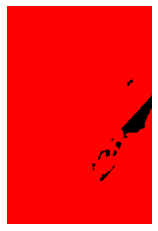

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio
import skimage.color
import skimage.filters
import skimage.measure


def connected_components(filename, sigma=1.0, t=0.5, connectivity=2):
    # load the image
    image = iio.imread(filename)[:,:,:3]
    
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(image)
    # denoise the image with a Gaussian filter
    blurred_image = skimage.filters.gaussian(gray_image, sigma=sigma)
    # mask the image according to threshold
    binary_mask = blurred_image < t
    # perform connected component analysis
    labeled_image, count = skimage.measure.label(binary_mask,
                                                 connectivity=connectivity, return_num=True)
    return labeled_image, count

def enhanced_connected_components(filename, sigma=1.0, t=0.5, connectivity=2, min_area=0):
    image = iio.imread(filename)[:,:,:3]
    gray_image = skimage.color.rgb2gray(image)
    blurred_image = skimage.filters.gaussian(gray_image, sigma=sigma)
    binary_mask = blurred_image < t
    object_mask = skimage.morphology.remove_small_objects(binary_mask,min_area)
    labeled_image, count = skimage.measure.label(object_mask,
                                                 connectivity=connectivity, return_num=True)
    return labeled_image, count

labeled_image, count = enhanced_connected_components(filename=img, sigma=2.0, t=0.9,connectivity=2, min_area=200)


colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)

fig, ax = plt.subplots()
plt.imshow(colored_label_image)
plt.axis("off");


print("Found", count, "objects in the image.")

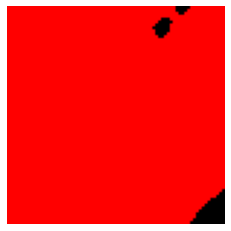

Found 1 objects in frame 0


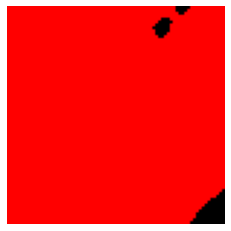

Found 1 objects in frame 1


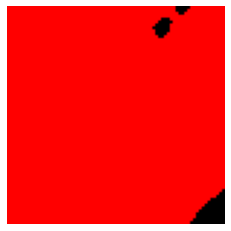

Found 1 objects in frame 2


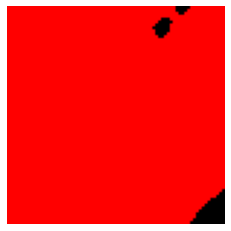

Found 1 objects in frame 3


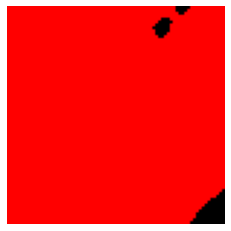

Found 1 objects in frame 4


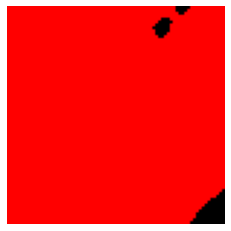

Found 1 objects in frame 5


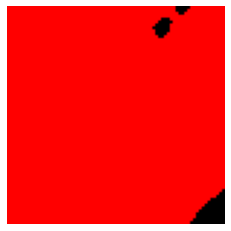

Found 1 objects in frame 6


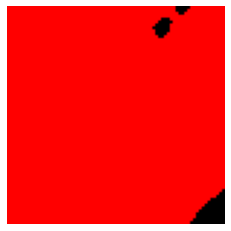

Found 1 objects in frame 7


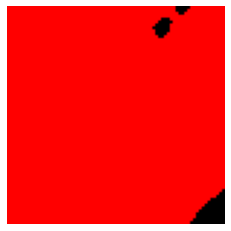

Found 1 objects in frame 8


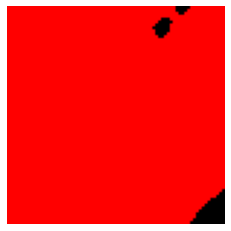

Found 1 objects in frame 9


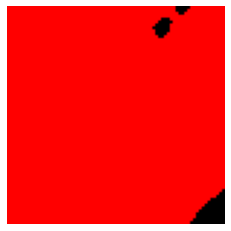

Found 1 objects in frame 10


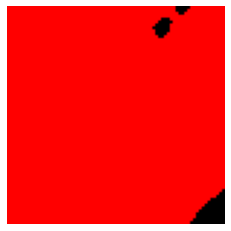

Found 1 objects in frame 11


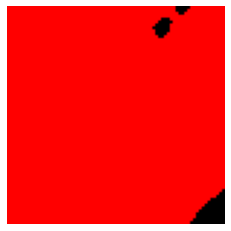

Found 1 objects in frame 12


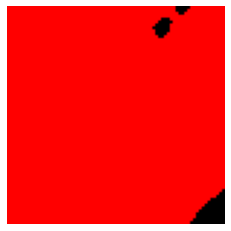

Found 1 objects in frame 13


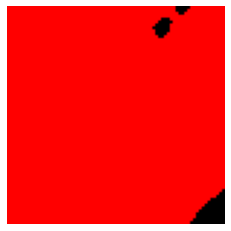

Found 1 objects in frame 14


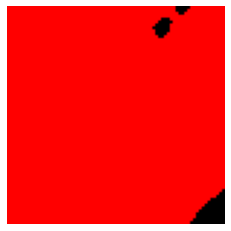

Found 1 objects in frame 15


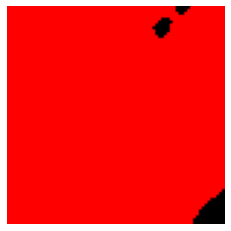

Found 1 objects in frame 16


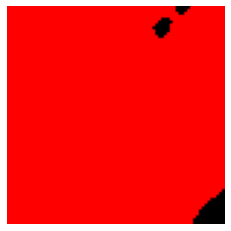

Found 1 objects in frame 17


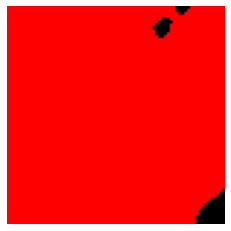

Found 1 objects in frame 18


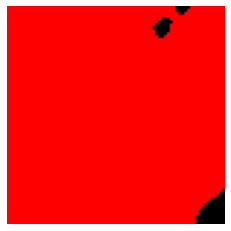

Found 1 objects in frame 19


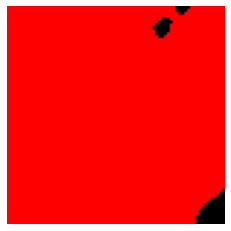

Found 1 objects in frame 20


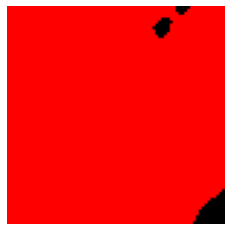

Found 1 objects in frame 21


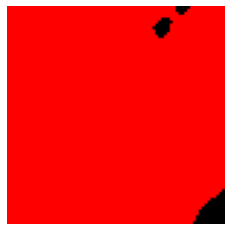

Found 1 objects in frame 22


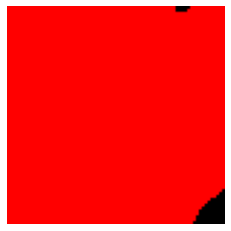

Found 1 objects in frame 23


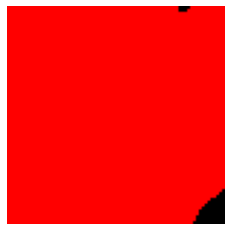

Found 1 objects in frame 24


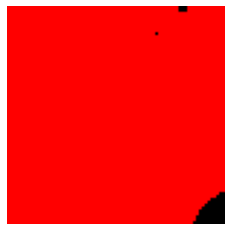

Found 1 objects in frame 25


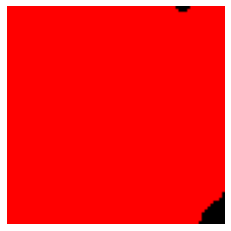

Found 1 objects in frame 26


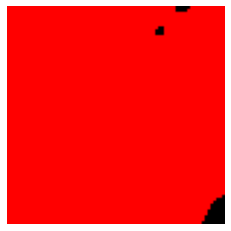

Found 1 objects in frame 27


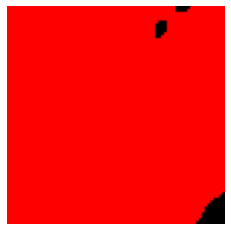

Found 1 objects in frame 28


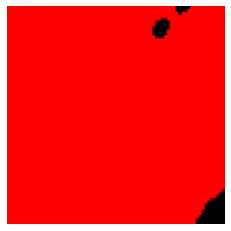

Found 1 objects in frame 29


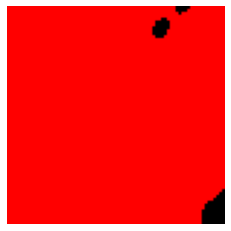

Found 1 objects in frame 30


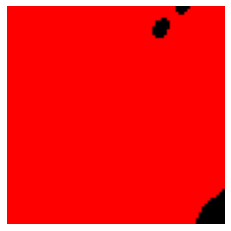

Found 1 objects in frame 31


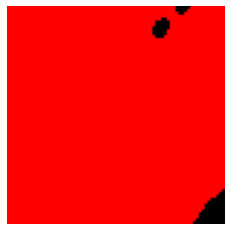

Found 1 objects in frame 32


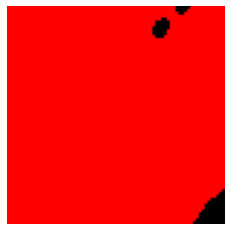

Found 1 objects in frame 33


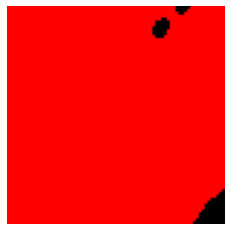

Found 1 objects in frame 34


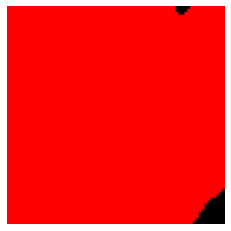

Found 1 objects in frame 35


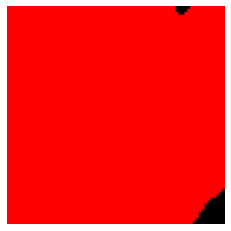

Found 1 objects in frame 36


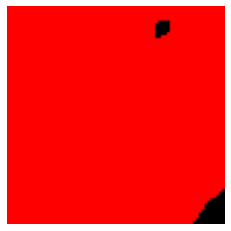

Found 1 objects in frame 37


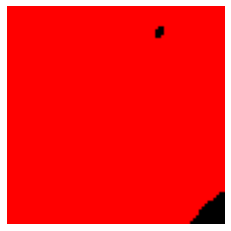

Found 1 objects in frame 38


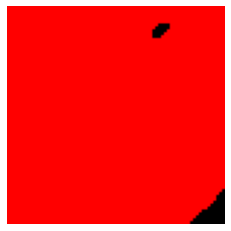

Found 1 objects in frame 39


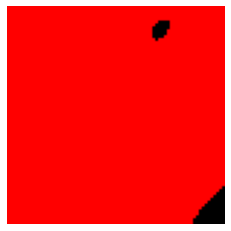

Found 1 objects in frame 40


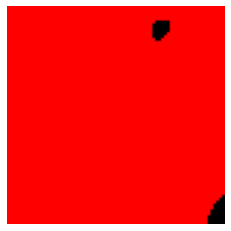

Found 1 objects in frame 41


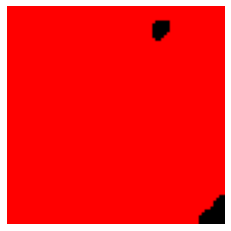

Found 1 objects in frame 42


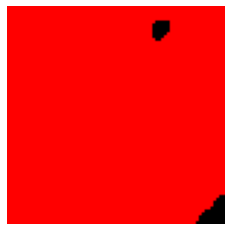

Found 1 objects in frame 43


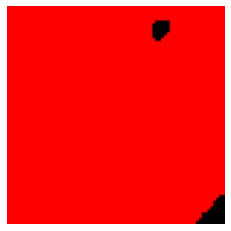

Found 1 objects in frame 44


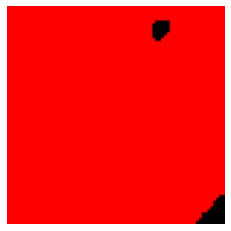

Found 1 objects in frame 45


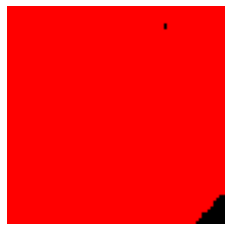

Found 1 objects in frame 46


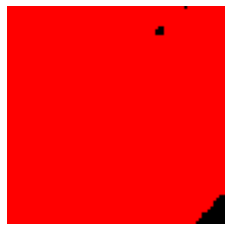

Found 1 objects in frame 47


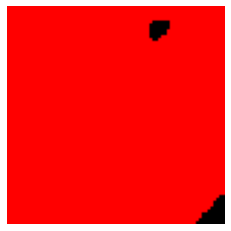

Found 1 objects in frame 48


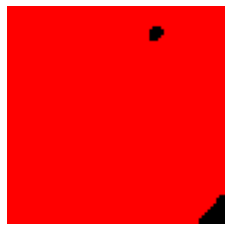

Found 1 objects in frame 49


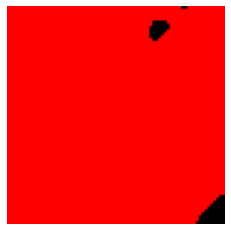

Found 1 objects in frame 50


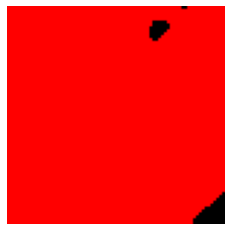

Found 1 objects in frame 51


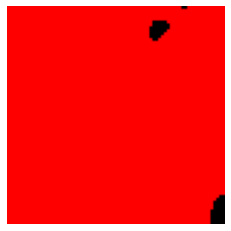

Found 1 objects in frame 52


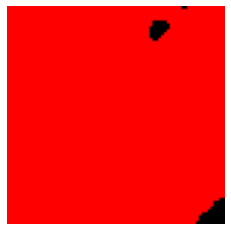

Found 1 objects in frame 53


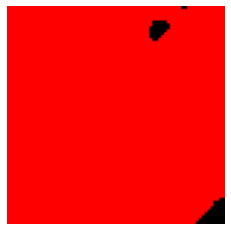

Found 1 objects in frame 54


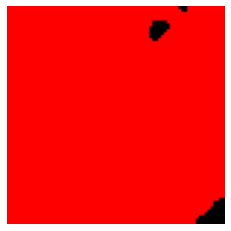

Found 1 objects in frame 55


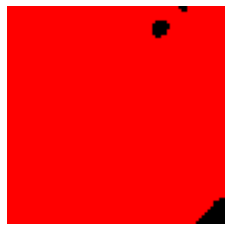

Found 1 objects in frame 56


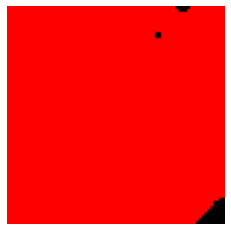

Found 1 objects in frame 57


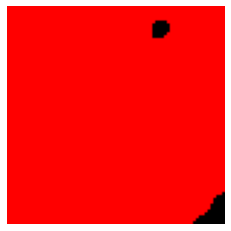

Found 1 objects in frame 58


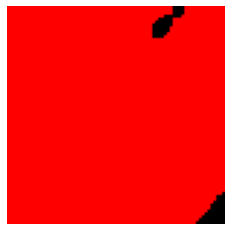

Found 1 objects in frame 59


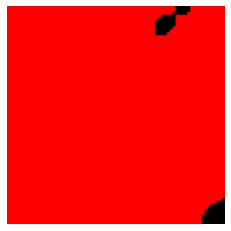

Found 1 objects in frame 60


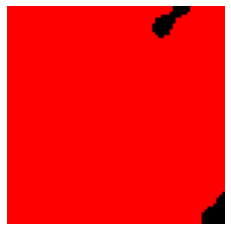

Found 1 objects in frame 61


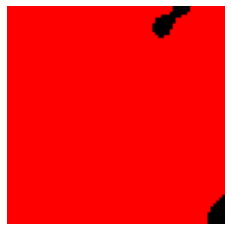

Found 1 objects in frame 62


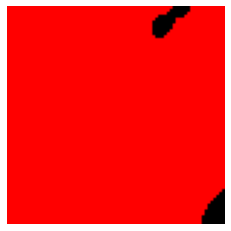

Found 1 objects in frame 63


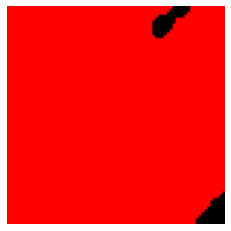

Found 1 objects in frame 64


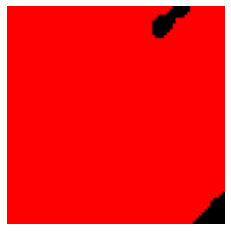

Found 1 objects in frame 65


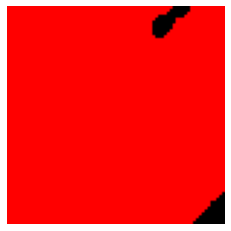

Found 1 objects in frame 66


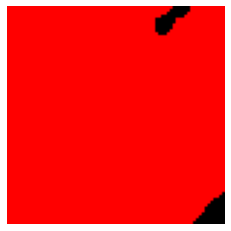

Found 1 objects in frame 67


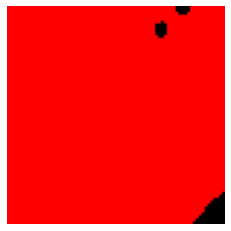

Found 1 objects in frame 68


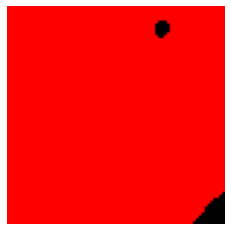

Found 1 objects in frame 69


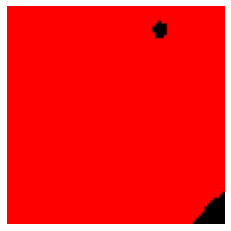

Found 1 objects in frame 70


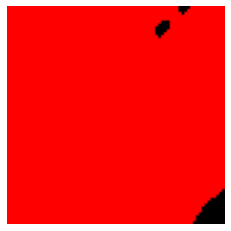

Found 1 objects in frame 71


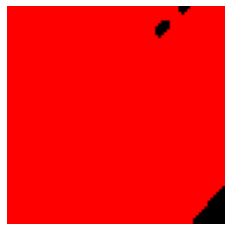

Found 1 objects in frame 72


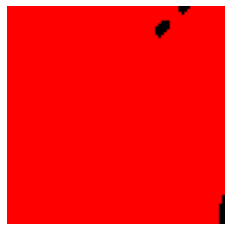

Found 1 objects in frame 73


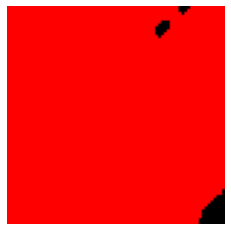

Found 1 objects in frame 74


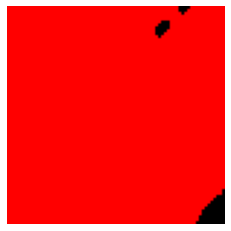

Found 1 objects in frame 75


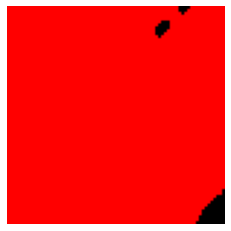

Found 1 objects in frame 76


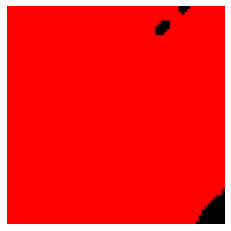

Found 1 objects in frame 77


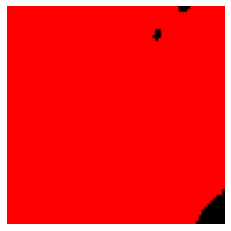

Found 1 objects in frame 78


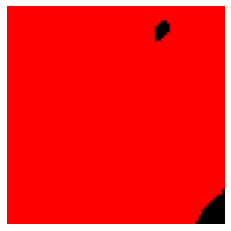

Found 1 objects in frame 79


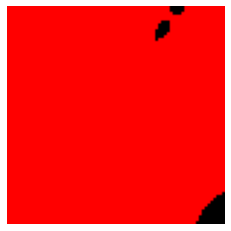

Found 1 objects in frame 80


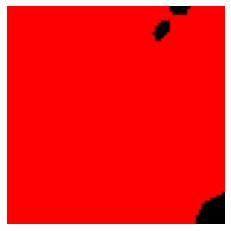

Found 1 objects in frame 81


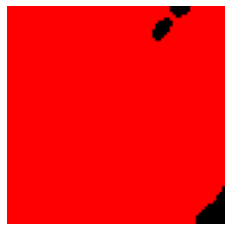

Found 1 objects in frame 82


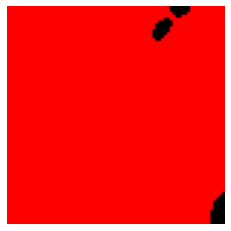

Found 1 objects in frame 83


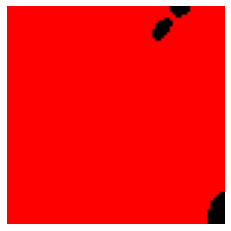

Found 1 objects in frame 84


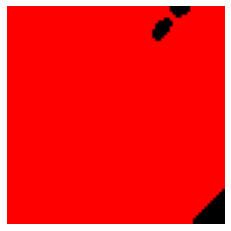

Found 1 objects in frame 85


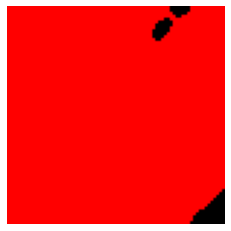

Found 1 objects in frame 86


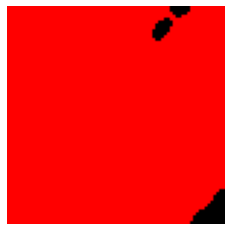

Found 1 objects in frame 87


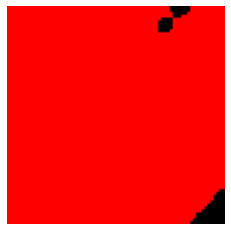

Found 1 objects in frame 88


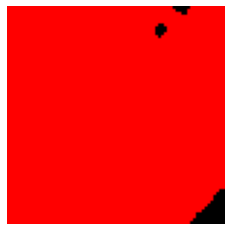

Found 1 objects in frame 89


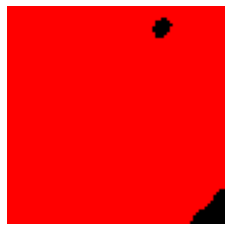

Found 1 objects in frame 90


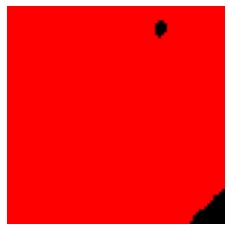

Found 1 objects in frame 91


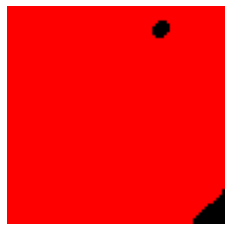

Found 1 objects in frame 92


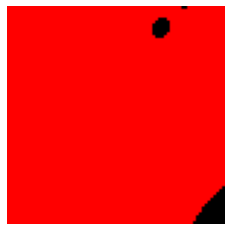

Found 1 objects in frame 93


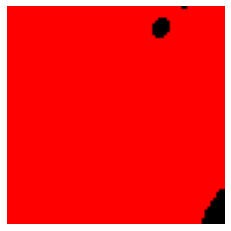

Found 1 objects in frame 94


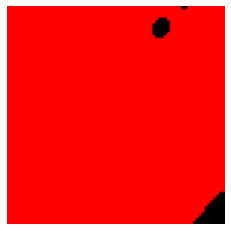

Found 1 objects in frame 95


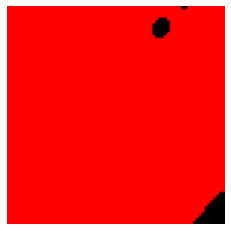

Found 1 objects in frame 96


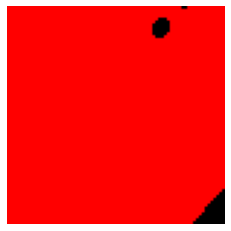

Found 1 objects in frame 97


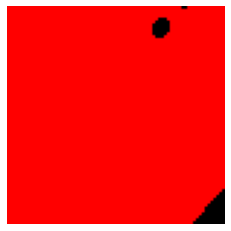

Found 1 objects in frame 98


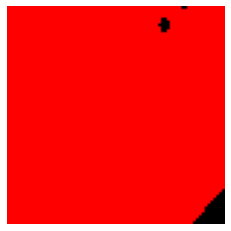

Found 1 objects in frame 99


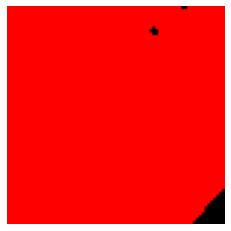

Found 1 objects in frame 100


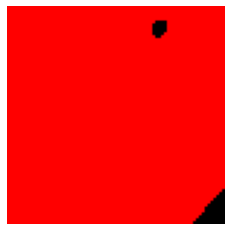

Found 1 objects in frame 101


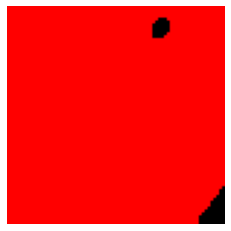

Found 1 objects in frame 102


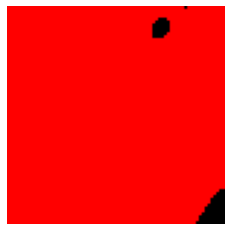

Found 1 objects in frame 103


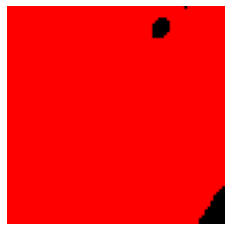

Found 1 objects in frame 104


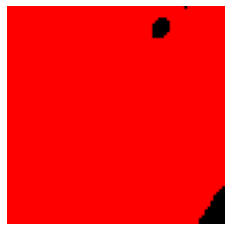

Found 1 objects in frame 105


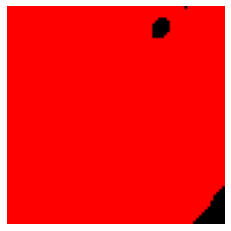

Found 1 objects in frame 106


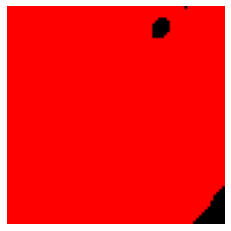

Found 1 objects in frame 107


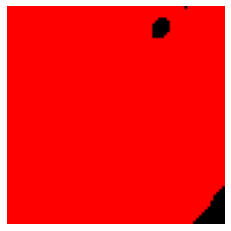

Found 1 objects in frame 108


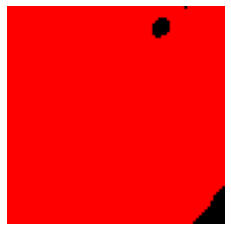

Found 1 objects in frame 109


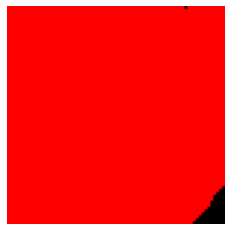

Found 1 objects in frame 110


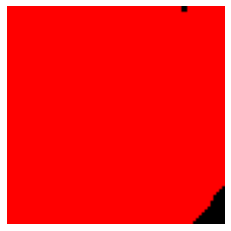

Found 1 objects in frame 111


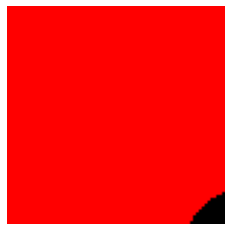

Found 1 objects in frame 112


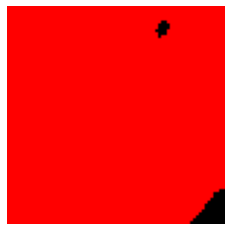

Found 1 objects in frame 113


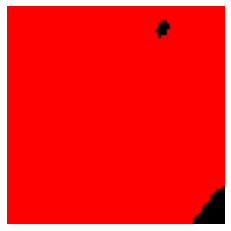

Found 1 objects in frame 114


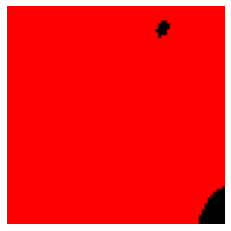

Found 1 objects in frame 115


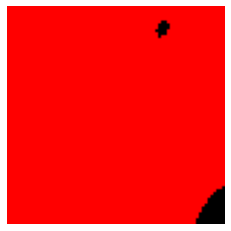

Found 1 objects in frame 116


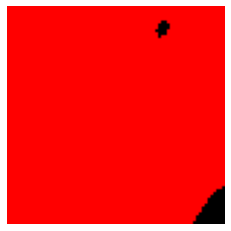

Found 1 objects in frame 117


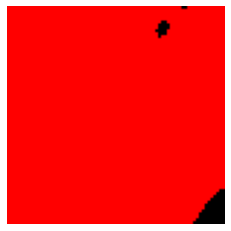

Found 1 objects in frame 118


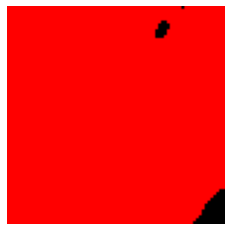

Found 1 objects in frame 119


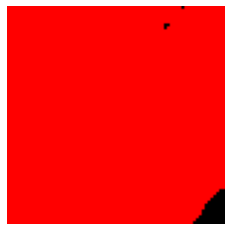

Found 1 objects in frame 120


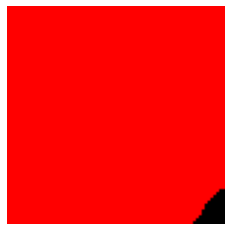

Found 1 objects in frame 121


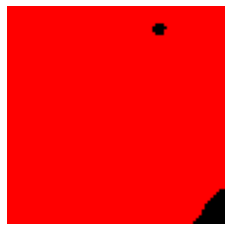

Found 1 objects in frame 122


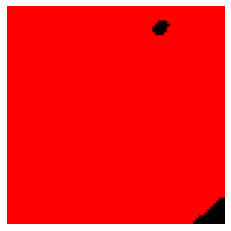

Found 1 objects in frame 123


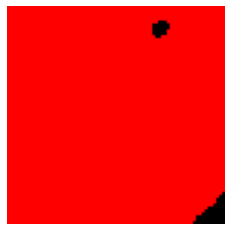

Found 1 objects in frame 124


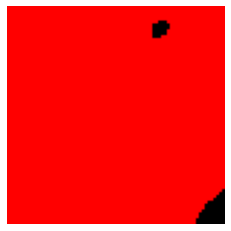

Found 1 objects in frame 125


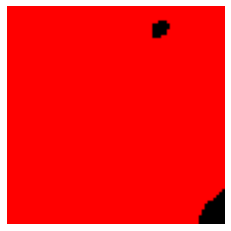

Found 1 objects in frame 126


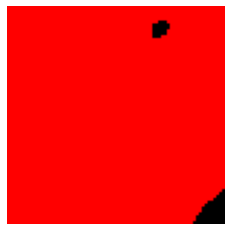

Found 1 objects in frame 127


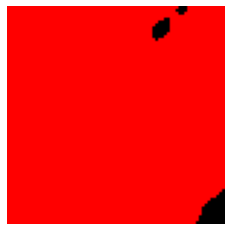

Found 1 objects in frame 128


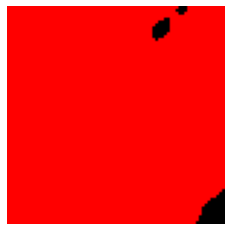

Found 1 objects in frame 129


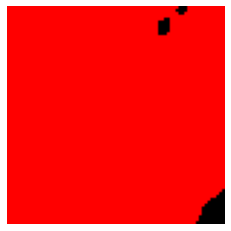

Found 1 objects in frame 130


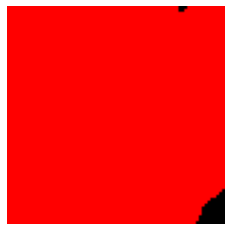

Found 1 objects in frame 131


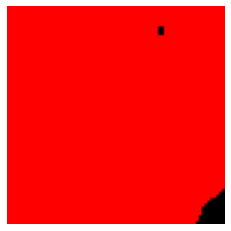

Found 1 objects in frame 132


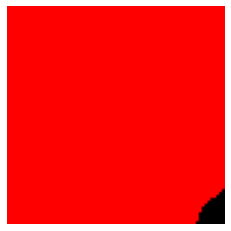

Found 1 objects in frame 133


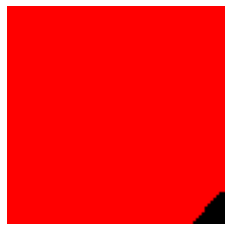

Found 1 objects in frame 134


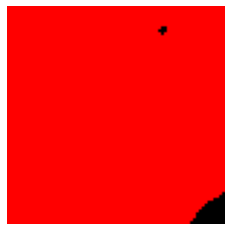

Found 1 objects in frame 135


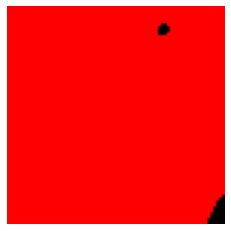

Found 1 objects in frame 136


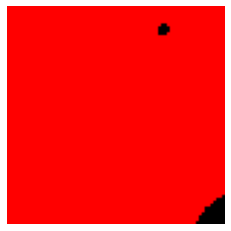

Found 1 objects in frame 137


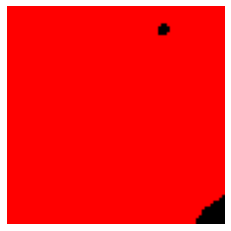

Found 1 objects in frame 138


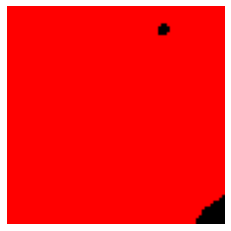

Found 1 objects in frame 139


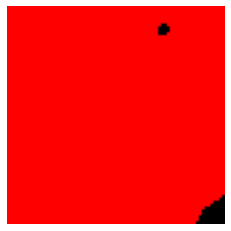

Found 1 objects in frame 140


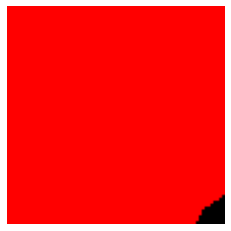

Found 1 objects in frame 141


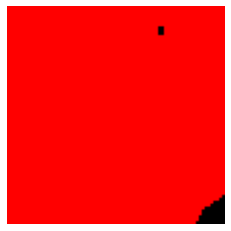

Found 1 objects in frame 142


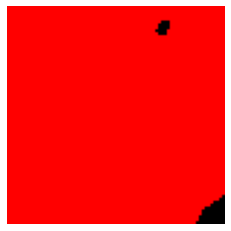

Found 1 objects in frame 143


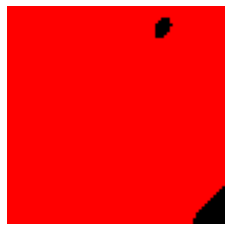

Found 1 objects in frame 144


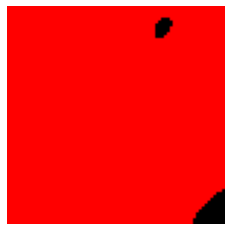

Found 1 objects in frame 145


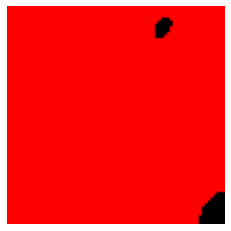

Found 1 objects in frame 146


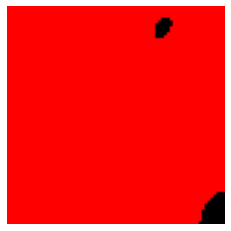

Found 1 objects in frame 147


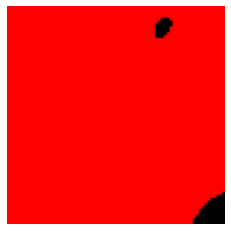

Found 1 objects in frame 148


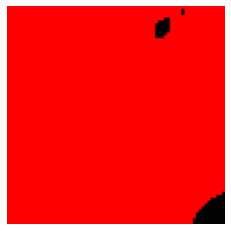

Found 1 objects in frame 149


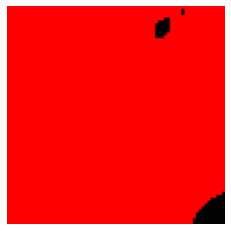

Found 1 objects in frame 150


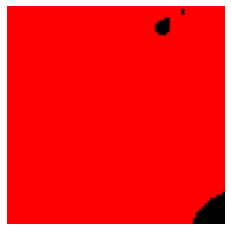

Found 1 objects in frame 151


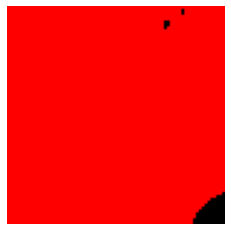

Found 1 objects in frame 152


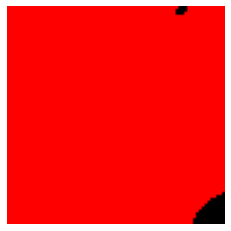

Found 1 objects in frame 153


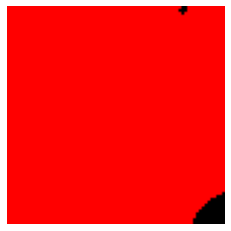

Found 1 objects in frame 154


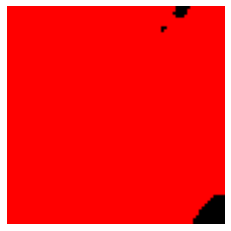

Found 1 objects in frame 155


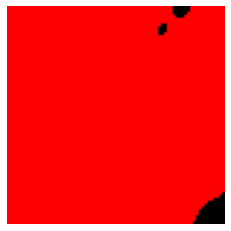

Found 1 objects in frame 156


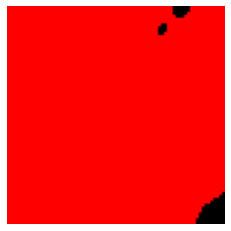

Found 1 objects in frame 157


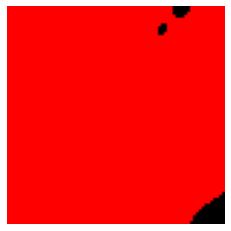

Found 1 objects in frame 158


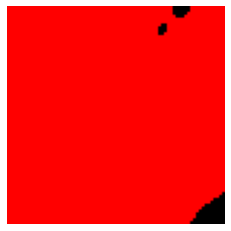

Found 1 objects in frame 159


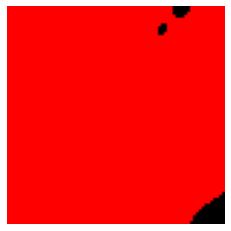

Found 1 objects in frame 160


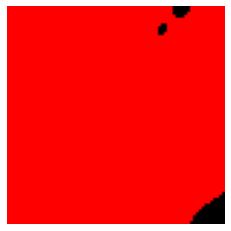

Found 1 objects in frame 161


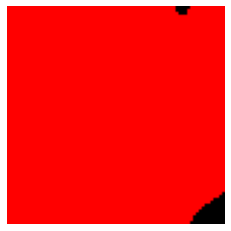

Found 1 objects in frame 162


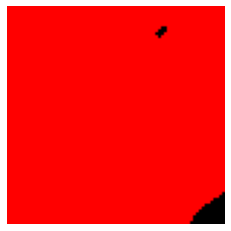

Found 1 objects in frame 163


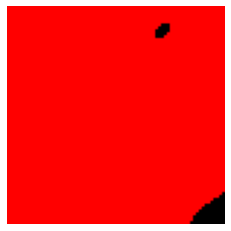

Found 1 objects in frame 164


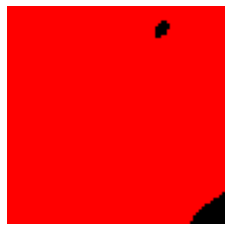

Found 1 objects in frame 165


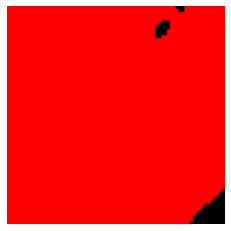

Found 1 objects in frame 166


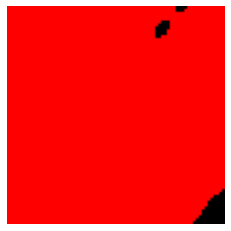

Found 1 objects in frame 167


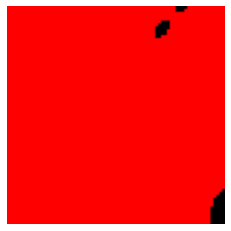

Found 1 objects in frame 168


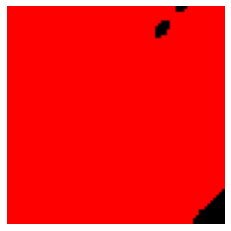

Found 1 objects in frame 169


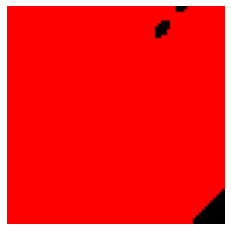

Found 1 objects in frame 170


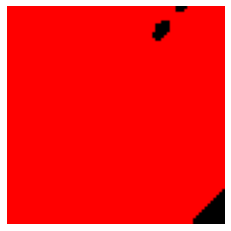

Found 1 objects in frame 171


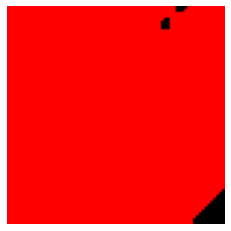

Found 1 objects in frame 172


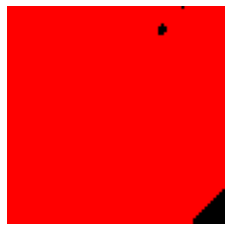

Found 1 objects in frame 173


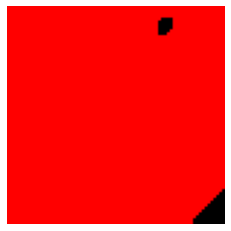

Found 1 objects in frame 174


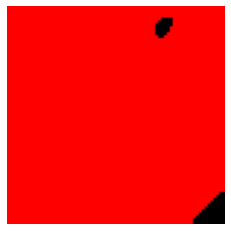

Found 1 objects in frame 175


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ayush\Desktop\Coding Recomp\Andrew NG Deep Learning\AndrewNg\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ayush\AppData\Local\Temp/ipykernel_11048/4258834474.py", line 36, in <module>
    plt.show()
  File "C:\Users\ayush\Desktop\Coding Recomp\Andrew NG Deep Learning\AndrewNg\lib\site-packages\matplotlib\pyplot.py", line 421, in show
    return _get_backend_mod().show(*args, **kwargs)
  File "C:\Users\ayush\Desktop\Coding Recomp\Andrew NG Deep Learning\AndrewNg\lib\site-packages\matplotlib_inline\backend_inline.py", line 41, in show
    display(
  File "C:\Users\ayush\Desktop\Coding Recomp\Andrew NG Deep Learning\AndrewNg\lib\site-packages\IPython\core\display.py", line 320, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "C:\Users\ayush\Desktop\Coding Recomp\Andrew NG Deep Learning\AndrewNg\


KeyboardInterrupt



In [14]:
import cv2
import numpy as np
import skimage.color
import skimage.filters
import skimage.measure
import skimage.morphology
import imageio
import matplotlib.pyplot as plt

def enhanced_connected_components(frame, sigma=1.0, t=0.5, connectivity=2, min_area=0):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred_frame = skimage.filters.gaussian(gray_frame, sigma=sigma)
    binary_mask = blurred_frame < t
    object_mask = skimage.morphology.remove_small_objects(binary_mask, min_area)
    labeled_image, count = skimage.measure.label(object_mask, connectivity=connectivity, return_num=True)
    return labeled_image, count

# define the window coordinates
x, y, w, h = 320,325,75,75

# read the video
vid = imageio.get_reader(path)

# iterate over each frame of the video
for i, frame in enumerate(vid):
    # crop the frame to the specified window
    cropped_frame = frame[y:y+h, x:x+w, :]

    # apply the enhanced_connected_components function on the cropped frame
    labeled_image, count = enhanced_connected_components(cropped_frame, sigma=2.0, t=0.9, connectivity=2, min_area=200)

    # display the labeled image with colored labels
    colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
    plt.imshow(colored_label_image)
    plt.axis("off")
    plt.show()

    # print the count of objects found in each frame
    print(f"Found {count} objects in frame {i}")

    # press q to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release the video reader and destroy all windows
vid.close()
cv2.destroyAllWindows()


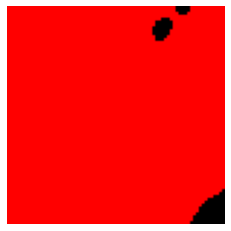

NameError: name 'i' is not defined

In [7]:
### TRYING CONNECTED COMPONENET ANALYSIS PROVIDED BY OPENAI

'''
NOT WORKING AS IT REQUIRES SOMETHING I DONT FUNCKING KNOW 

'''


import cv2
import skimage.color
import skimage.filters
import skimage.measure
import skimage.morphology
import numpy as np
import matplotlib.pyplot as plt

def enhanced_connected_components(frame, sigma=1.0, t=0.5, connectivity=2, min_area=0):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred_frame = skimage.filters.gaussian(gray_frame, sigma=sigma)
    binary_mask = blurred_frame < t
    object_mask = skimage.morphology.remove_small_objects(binary_mask, min_area)
    labeled_image, count = skimage.measure.label(object_mask, connectivity=connectivity, return_num=True)
    return labeled_image, count

def find_connected_components_in_window(video_file, x, y, w, h, sigma=2.0, t=0.9, connectivity=2, min_area=200):
    cap = cv2.VideoCapture(video_file)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Crop the frame to the specified window
        window = frame[y:y+h, x:x+w]
        
        # Find connected components in the window
        labeled_image, count = enhanced_connected_components(window, sigma=sigma, t=t, connectivity=connectivity, min_area=min_area)
        
        # Display the labeled image
        colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
        frame[y:y+h, x:x+w] = colored_label_image
        
        cropped_frame = frame[y:y+h, x:x+w, :]

        plt.imshow(colored_label_image)
        plt.axis("off")
        plt.show()

    # print the count of objects found in each frame
        print(f"Found {count} objects in frame {i}")
        
        # Display the original video along with the frames received
        cv2.imshow('Video', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

find_connected_components_in_window(path, 320,325,75,75, sigma=2.0, t=0.9, connectivity=2, min_area=200)

In [13]:
### pure agglomerative function received from medium ai article, need to write main function to make use of the code.

import os
import cv2
import numpy

def calculate_contour_distance(contour1, contour2): 
    x1, y1, w1, h1 = cv2.boundingRect(contour1)
    c_x1 = x1 + w1/2
    c_y1 = y1 + h1/2

    x2, y2, w2, h2 = cv2.boundingRect(contour2)
    c_x2 = x2 + w2/2
    c_y2 = y2 + h2/2

    return max(abs(c_x1 - c_x2) - (w1 + w2)/2, abs(c_y1 - c_y2) - (h1 + h2)/2)

def merge_contours(contour1, contour2):
    return numpy.concatenate((contour1, contour2), axis=0)

def agglomerative_cluster(contours, threshold_distance=40.0):
    current_contours = contours
    while len(current_contours) > 1:
        min_distance = None
        min_coordinate = None

        for x in range(len(current_contours)-1):
            for y in range(x+1, len(current_contours)):
                distance = calculate_contour_distance(current_contours[x], current_contours[y])
                if min_distance is None:
                    min_distance = distance
                    min_coordinate = (x, y)
                elif distance < min_distance:
                    min_distance = distance
                    min_coordinate = (x, y)

        if min_distance < threshold_distance:
            index1, index2 = min_coordinate
            current_contours[index1] = merge_contours(current_contours[index1], current_contours[index2])
            del current_contours[index2]
        else: 
            break

    return current_contours



In [15]:
###### AGGLOMERATIVE CLUSTERING TRIED FROM OPENAI 

'''
Error during the passing of arguments in agglomerative clustering function from sklearn
'''

import cv2
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# Load the image and convert it to grayscale
img = cv2.imread(img1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the window coordinates
x, y, w, h = 320,325,75,75

# Extract the contours within the specified window
roi = gray[y:y+h, x:x+w]
_, thresh = cv2.threshold(roi, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Convert contours to feature vectors
contour_features = []
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    aspect_ratio = float(w)/h
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour,True)
    circularity = 4*np.pi*(area/(perimeter*perimeter))
    contour_features.append([aspect_ratio, area, perimeter, circularity])

# Cluster contours using Agglomerative Clustering
n_clusters =4  # specify the number of clusters to group the contours into
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(contour_features)
labels = agg_clustering.labels_

# Draw contours with the same cluster label in different colors
colors = [(0, 0, 255), (0, 255, 0)] # specify colors for each cluster label
for contour, label in zip(contours, labels):
    x,y,w,h = cv2.boundingRect(contour)
    color = colors[label]
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

# Show the output image
cv2.imshow("Output", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


ValueError: Found array with 1 sample(s) (shape=(1, 4)) while a minimum of 2 is required by AgglomerativeClustering.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### working on the center of mass and tracking that through the video, com of the hand conoturs 

### get convex hull of contours and make that into a continous contour that tracks the moment within the frame 

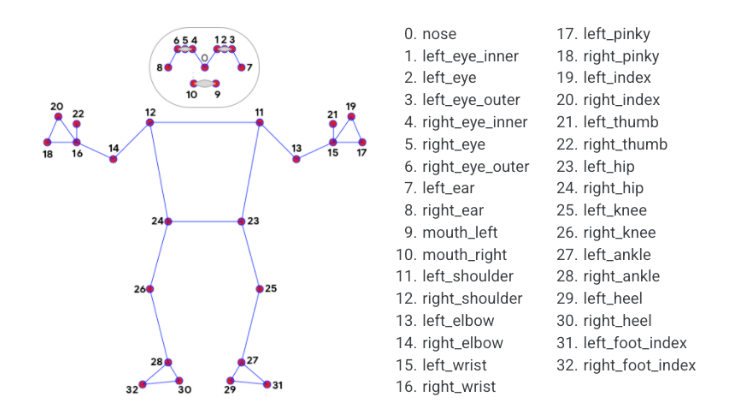

In [21]:
from IPython import display
display.Image(r"C:\Users\ayush\Desktop\img.png")

In [22]:
###### convex hull + clustering of points


"""
This code gives difference images in a box and working impottant, work with this 


"""


import cv2

# Define the coordinates of the window
x,y,w,h = 320,325,75,75
# x,y,w,h = 315,105,75,75

# Open the video capture object and read the first frame
cap = cv2.VideoCapture(path)
ret, frame1 = cap.read()

# Convert the frame to grayscale and apply a Gaussian blur
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray1 = cv2.GaussianBlur(gray1, (5, 5), 0)

# Loop over the frames
while True:
    # Read the current frame
    ret, frame2 = cap.read()

    # Convert the frame to grayscale and apply a Gaussian blur
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.GaussianBlur(gray2, (5, 5), 0)

    # Compute the absolute difference between the two frames
    diff = cv2.absdiff(gray1, gray2)

    # Apply a threshold to the difference image
    thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)[1]
    # Apply a morphological operators and thresholding that 
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CROSS , kernel)
        
    
    # Draw a rectangle around the window
    cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the original video feed and the difference image
    cv2.imshow("Original", frame2)
    cv2.imshow("Difference",diff[y:y+h,x:x+w])
    cv2.imshow("Morphed Result", thresh[y:y+h, x:x+w])
    cv2.imshow("Mormorphed",morph[y:y+h,x:x+w])
    

    # Update the previous frame
    gray1 = gray2.copy()

    # Check for the 'q' key to quit
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


In [72]:
'''
tracking the wrist and have them in a frame
get to see the difference image formed within these windows

Perfectly honed into the position of the rope with this set of code

IN THIS CODE BASE WE'RE TRACKING THE THE FINGERS AS WELL TO TRY AND LOCK INTO THE ROPE 

'''

path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"
path3 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g24_c06.avi"
path4 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g22_c01.avi"

## Imports 
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2
import time
import random
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []
left_wrist_y = []
left_wrist_x = []
right_wrist_x = []
right_wrist_y = []
differenc_wrist_r = []
difference_ankle_r = []
left_foot_y = []
right_foot_y = []
left_heel_y = []
right_heel_y = []
right_index_y = []
right_index_x = []
left_index_y = []
left_index_x = []
left_thumb_y = []
left_thumb_x = []
right_thumb_y = []
right_thumb_x = []


cap = cv2.VideoCapture(path)

if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        # Recolor image to RGB
       
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)            
            right_hip_y.append(landmarks[23].y)            
            left_hip_y.append(landmarks[24].y)
            left_wrist_y.append(landmarks[15].y)
            left_wrist_x.append(landmarks[15].x)
            right_wrist_y.append(landmarks[16].y)
            right_wrist_x.append(landmarks[16].x)
            left_heel_y.append(landmarks[29].y)
            right_heel_y.append(landmarks[30].y)
            left_foot_y.append(landmarks[31].y)
            right_foot_y.append(landmarks[32].y)
            right_index_y.append(landmarks[20].y)
            right_index_x.append(landmarks[20].x)
            left_index_y.append(landmarks[19].y)
            left_index_x.append(landmarks[19].x)
            left_thumb_y.append(landmarks[21].y)
            left_thumb_x.append(landmarks[21].x)
            right_thumb_y.append(landmarks[22].y)
            right_thumb_x.append(landmarks[22].x)
            
        except:
            pass


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               

    ###obtaining the right and left hand positions and subsequently marking them on the video feed.
    
        right_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]
        left_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST]
        
        
        
    #### obtaining the right and left thumb position and subsequently marking them on a video feed 
        right_thumb = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_THUMB]
        left_thumb = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_THUMB]
        
        
    #### obtaining the right and left index finger positions and subsequently marking them on a video feed 
        right_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX]
        left_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX]
        
        
        
        # If left wrist landmark is detected, draw the bounding rectangle around it
        if left_wrist.visibility > 0:
            left_wrist_x = int(left_wrist.x * frame.shape[1])
            left_wrist_y = int(left_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (left_wrist_x - 30, left_wrist_y - 30),
                          (left_wrist_x + 40, left_wrist_y + 30), (0, 255, 0), 2)
            try:
                LeftWristROI = frame[left_wrist_y - 30:left_wrist_y + 30, left_wrist_x - 30:left_wrist_x + 40]
            except : 
                LeftWristROI = frame[200:280,200:280]
                
                


        ##If right wrist landmark is detected, draw the bounding rectangle around it
        if right_wrist.visibility > 0:
            right_wrist_x = int(right_wrist.x * frame.shape[1])
            right_wrist_y = int(right_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (right_wrist_x - 40, right_wrist_y - 30),
                          (right_wrist_x + 30 , right_wrist_y + 30), (0, 255, 0), 2)
            try:
                RightWristROI = frame[right_wrist_y - 30:right_wrist_y + 30, right_wrist_x - 30:right_wrist_x + 30]
            except: 
                RightWristROI = frame[200:280,200:280]
                
                
        # If left index landmark is detected, draw the bounding rectangle around it
        if left_index.visibility > 0:
            left_index_x = int(left_index.x * frame.shape[1])
            left_index_y = int(left_index.y * frame.shape[0])
            cv2.rectangle(frame, (left_index_x - 10, left_index_y - 20),
                          (left_index_x + 30, left_index_y + 20), (0, 255, 0), 2)
            try:
                LeftIndexROI = frame[left_index_y - 20:left_index_y + 20, left_index_x - 10:left_index_x + 30]
            except : 
                LeftIndexROI = frame[200:280,200:280]
                

            
                
            
        
        # If right index landmark is detected, draw the bounding rectangle around it
        if right_index.visibility > 0:
            right_index_x = int(right_index.x * frame.shape[1])
            right_index_y = int(right_index.y * frame.shape[0])
            cv2.rectangle(frame, (right_index_x - 30, right_index_y - 20),
                          (right_index_x + 10, right_index_y + 20), (0, 255, 0), 2)
            try:
                RightIndexROI = frame[right_index_y - 20:right_index_y + 20, right_index_x - 30:right_index_x + 10]
            except : 
                RightIndexROI = frame[200:280,200:280]
                
                
        # If right thumb landmark is detected, draw the bounding rectangle around it
        if right_thumb.visibility > 0:
            right_thumb_x = int(right_thumb.x * frame.shape[1])
            right_thumb_y = int(right_thumb.y * frame.shape[0])
            cv2.rectangle(frame, (right_thumb_x - 30, right_thumb_y - 30),
                          (right_thumb_x + 40, right_thumb_y + 30), (0, 255, 0), 2)
            try:
                RightThumbROI = frame[right_thumb_y - 30:right_thumb_y + 30, right_thumb_x - 30:righ_thumb_x + 40]
            except : 
                RightThumbROI = frame[200:280,200:280]
                
                
                
                
        # If left thumb landmark is detected, draw the bounding rectangle around it
        if left_thumb.visibility > 0:
            left_thumb_x = int(left_thumb.x * frame.shape[1])
            left_thumb_y = int(left_thumb.y * frame.shape[0])
            cv2.rectangle(frame, (left_thumb_x - 30, left_thumb_y - 30),
                          (left_thumb_x + 40, left_thumb_y + 30), (0, 255, 0), 2)
            try:
                LeftThumbROI = frame[left_thumb_y - 30:left_thumb_y + 30, left_thumb_x - 30:left_thumb_x + 40]
            except : 
                LeftThumbROI = frame[200:280,200:280]
                
              
                
        

#       Adding the counter and initializing the counter 
        counter = 0 
        

        # Initialize a variable to keep track of the minimum value seen so far
        min_value = None

        # Get the first reading from the sensor
        readings = left_ankle_y

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
            if current_reading < previous_reading and (min_value is None or current_reading < min_value):
                min_value = current_reading

            # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
            elif min_value is not None:
                counter += 1
                min_value = None

#### finding difference of frames and showing them below in new windwos
    
        
        


#         # Initialize the plot
#         plt.ion()  # Turn on interactive mode
#         fig, ax = plt.subplots()
#         line, = ax.plot([], [], 'b-')
#         ax.set_xlim(0, 10)
#         ax.set_ylim(0, 100)
#         ax.set_xlabel('Time')
#         ax.set_ylabel('Sensor Data')
#         fig.canvas.draw()

#         # Initialize the sensor data
#         sensor_data = left_ankle_y
        
#         # Main loop
#         while True:
#             # Update the plot
#             line.set_xdata(range(len(sensor_data)))
#             line.set_ydata(sensor_data)
#             ax.relim()
#             ax.autoscale_view()
#             fig.canvas.draw()
#             fig.canvas.flush_events()

#             #Wait for a short amount of time before updating again
#             time.sleep(0.1)

        cv2.imshow('Mediapipe Feed', image)
#         cv2.imshow("RightWristCam", LeftWristROI)
#         cv2.imshow("LeftWristCam",RightWristROI)
        cv2.imshow("LeftIndexCam",LeftIndexROI)
        cv2.imshow("RightIndexCam",RightIndexROI)
#         cv2.imshow("RightThumbCam",RightThumbROI)
#         cv2.imshow("LeftThumbCam",LeftThumbROI)
        
        

        if cv2.waitKey(100) & 0xFF == ord('q'):
            break
                
        if ret ==False:
            break
        
    print(f"the final counter reading is : {counter}") 
    cap.release()
    cv2.destroyAllWindows()

the final counter reading is : 3


----------------------------------------------------------------------------

In [2]:
#####3 making a tracker for the indexs 
'''This is exactly what I was looking for
This set of code allows us to track the bounding box around the indexs, now I will replace the indexs with thumb index to 
be more in line with the rope and see the result received.

'''

path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"
img1 = r"C:\Users\ayush\Desktop\Jump Rope Code\JupyterEnvironment\jump.png"

import cv2
import mediapipe as mp
import numpy as np 

# Load the video
cap = cv2.VideoCapture(path1)

#masks
knnfgbg = cv2.createBackgroundSubtractorKNN()

# Initialize the OpenPose model
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    while cap.isOpened():
        # Read the frame
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame with OpenPose to get the landmarks
        results = pose.process(frame_rgb)
        right_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX]
        left_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX]
        

        # If left index landmark is detected, draw the bounding rectangle around it
        if left_index.visibility > 0:
            left_index_x = int(left_index.x * frame.shape[1])
            left_index_y = int(left_index.y * frame.shape[0])
            cv2.rectangle(frame, (left_index_x - 10, left_index_y - 20),
                          (left_index_x + 30, left_index_y + 20), (0, 255, 0), 2)
            
            roi1 = frame[left_index_y - 20:left_index_y + 20, left_index_x - 10:left_index_x + 40]
            
        # If right index landmark is detected, draw the bounding rectangle around it
        if right_index.visibility > 0:
            right_index_x = int(right_index.x * frame.shape[1])
            right_index_y = int(right_index.y * frame.shape[0])
            cv2.rectangle(frame, (right_index_x - 25, right_index_y - 20),
                          (right_index_x + 20 , right_index_y + 20), (255, 0, 0), 2)
            
            roi2 = frame[right_index_y - 25:right_index_y + 20, right_index_x - 20:right_index_x + 20]
        
        ## applying masks 
        knnmask = knnfgbg.apply(roi1) 
        
        
        # contour detection within this space 
        
        # apply edge detection within the rectangle given for the right index 
        edges = cv2.Canny(frame, 100, 200)
        
        contours, hierarchy = cv2.findContours(edges[right_index_y - 25:right_index_y + 20, right_index_x - 20:right_index_x + 20], cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        
        cv2.drawContours(frame[right_index_y - 25:right_index_y + 20, right_index_x - 20:right_index_x + 20], contours,-1, (0, 0, 255), -1)
        
        
        # Show the frame with bounding rectangle
        cv2.imshow('frame', frame)
        cv2.imshow("roi1",roi1)
        cv2.imshow("roi2",roi2)
        cv2.imshow("canny",edges[right_index_y - 25:right_index_y + 20, right_index_x - 20:right_index_x + 20])
        
        
        ##displays masks which are formed around the arms 
       
        cv2.imshow("KNNMASK",knnmask)
        if cv2.waitKey(100) == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [21]:
#### working with moments 


import cv2
import numpy as np

# Initialize the video capture object
cap = cv2.VideoCapture(path)

# Define the window coordinates
x, y, w, h = 100, 100, 200, 200

while cap.isOpened():
    # Read the frame from the video
    ret, frame = cap.read()
    
    print("start")

    if ret == True:
        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Apply any necessary pre-processing techniques
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

        # Find all the contours in the frame
        contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        
        # Initialize variables to store the combined moments
        m00, m10, m01 = 0.001, 0.001, 0.001

        # Loop through each contour
        for cnt in contours:
            # Calculate the moments of the contour
            moments = cv2.moments(cnt)
           
            print(moments)

            # Add up the moments of all the contours within the window
            if x < moments['m10']/moments['m00'] < x+w and y < moments['m01']/moments['m00'] < y+h:
                
                m00 += moments['m00']
                m10 += moments['m10']
                m01 += moments['m01']

        # Display the combined moment on the frame
        cv2.putText(frame, f"Combined Moment: {m00}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        # Display the frame
        cv2.imshow('Frame', frame)

        # Exit if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release the video capture object and close all windows
cap.release()
print("im end")
cv2.destroyAllWindows()

start
{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


ZeroDivisionError: float division by zero

In [91]:
## working code that calculates the sum of moments within a given window 

import cv2

# Open video file
cap = cv2.VideoCapture(path)

# Define window coordinates
x, y, w, h = 340, 340, 50, 50

while cap.isOpened():
    # Read frame
    ret, frame = cap.read()
    
    # Break if video is over
    if not ret:
        break
    
    # Select window from frame
    window = frame[y:y+h, x:x+w]
    
    # Convert to grayscale
    gray = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
    
    # Threshold image
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Calculate moments for each contour
    moments = [cv2.moments(cnt) for cnt in contours]
    
    # Combine moments of all contours within the window
    combined_moments = {}
    for m in moments:
        if m['m00'] == 0:
            continue  # avoid zero-division error
        for key, value in m.items():
            if key in combined_moments:
                combined_moments[key] += value
            else:
                combined_moments[key] = value
    
    # Print combined moments
    print(combined_moments)
    
    # Display window
    cv2.imshow('Window', window)
    
    
    # Wait for key press
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release video file and close window
cap.release()
cv2.destroyAllWindows()

{'m00': 2401.0, 'm10': 58824.5, 'm01': 58824.5, 'm20': 1921600.3333333333, 'm11': 1441200.25, 'm02': 1921600.3333333333, 'm30': 70618812.25, 'm21': 47079208.166666664, 'm12': 47079208.166666664, 'm03': 70618812.25, 'mu20': 480400.08333333326, 'mu11': 0.0, 'mu02': 480400.08333333326, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.08333333333333333, 'nu11': 0.0, 'nu02': 0.08333333333333333, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
{'m00': 2401.0, 'm10': 58824.5, 'm01': 58824.5, 'm20': 1921600.3333333333, 'm11': 1441200.25, 'm02': 1921600.3333333333, 'm30': 70618812.25, 'm21': 47079208.166666664, 'm12': 47079208.166666664, 'm03': 70618812.25, 'mu20': 480400.08333333326, 'mu11': 0.0, 'mu02': 480400.08333333326, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.08333333333333333, 'nu11': 0.0, 'nu02': 0.08333333333333333, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
{'m00': 2379.5, 'm10': 58766.0, 'm01': 58213.166666666664, 'm20': 1921385.75, 'm11

{'m00': 1815.0, 'm10': 45586.0, 'm01': 44846.33333333333, 'm20': 1537787.5, 'm11': 1140420.75, 'm02': 1565416.5, 'm30': 58426932.0, 'm21': 38790178.3, 'm12': 39574882.0, 'm03': 61156897.900000006, 'mu20': 392837.97052341606, 'mu11': 14048.87598714442, 'mu02': 457320.8452096728, 'mu30': 70235.34790033847, 'mu21': 87701.74775027484, 'mu12': -436775.14598141797, 'mu03': -122174.43807680905, 'nu20': 0.11925049762035561, 'nu11': 0.004264698369766612, 'nu02': 0.13882501808761474, 'nu30': 0.0005004539997025923, 'nu21': 0.0006249088493846751, 'nu12': -0.0031121917284050483, 'nu03': -0.0008705400916318537}
{'m00': 1786.5, 'm10': 44378.5, 'm01': 40820.666666666664, 'm20': 1483517.75, 'm11': 1027038.0416666666, 'm02': 1371023.25, 'm30': 56131682.150000006, 'm21': 34859479.86666667, 'm12': 34510164.63333333, 'm03': 53233804.1, 'mu20': 381110.10250489786, 'mu11': 13010.638550704345, 'mu02': 438290.6291709427, 'mu30': 345238.35688373446, 'mu21': 315416.719351694, 'mu12': -142038.65741537884, 'mu03':

{'m00': 1840.5, 'm10': 45737.166666666664, 'm01': 41775.166666666664, 'm20': 1518949.0833333333, 'm11': 1040040.5416666666, 'm02': 1387590.75, 'm30': 56946933.75, 'm21': 34954919.28333333, 'm12': 34362415.916666664, 'm03': 53456042.35, 'mu20': 382362.06095113046, 'mu11': 1910.8158524254104, 'mu02': 439389.4188248968, 'mu30': 196734.3476304114, 'mu21': 383258.47341541573, 'mu12': -206515.7319526039, 'mu03': 2014604.01675646, 'nu20': 0.11287640009329476, 'nu11': 0.0005640884300248278, 'nu02': 0.1297113414251061, 'nu30': 0.0013537567499578747, 'nu21': 0.0026372555256053676, 'nu12': -0.001421063832882592, 'nu03': 0.013862773933608323}
{'m00': 1868.5, 'm10': 46454.83333333333, 'm01': 40615.83333333333, 'm20': 1533486.75, 'm11': 994007.2916666666, 'm02': 1282463.4166666665, 'm30': 57003721.650000006, 'm21': 32935491.983333334, 'm12': 30652433.383333333, 'm03': 47655726.95, 'mu20': 378522.05102875177, 'mu11': -15787.607019147603, 'mu02': 399591.6385766956, 'mu30': 56315.186425320804, 'mu21': 

{'m00': 1935.5, 'm10': 49094.33333333333, 'm01': 42222.0, 'm20': 1637733.4166666667, 'm11': 1049734.2916666665, 'm02': 1297254.0833333333, 'm30': 61054153.400000006, 'm21': 35145179.65, 'm12': 30981615.383333333, 'm03': 46167489.7, 'mu20': 327476.7018851194, 'mu11': 86211.74803335429, 'mu02': 198505.73169708403, 'mu30': -172193.6091301227, 'mu21': -442348.4533028514, 'mu12': 528053.8504669769, 'mu03': 575260.7062106989, 'nu20': 0.5236867843286596, 'nu11': 0.12508812640358938, 'nu02': 0.15198988320466622, 'nu30': 0.38760302758221254, 'nu21': 0.06197994943420427, 'nu12': -0.00013817362728689182, 'nu03': -0.006097877627599191}
{'m00': 1940.5, 'm10': 49320.333333333336, 'm01': 42979.166666666664, 'm20': 1649062.5833333333, 'm11': 1077033.9583333333, 'm02': 1350106.75, 'm30': 61549144.400000006, 'm21': 36247487.36666667, 'm12': 32867994.633333333, 'm03': 49259543.35, 'mu20': 355446.9778010166, 'mu11': 80066.20555142459, 'mu02': 171062.5448115077, 'mu30': 174656.04341195058, 'mu21': -405747.

{'m00': 2166.5, 'm10': 55869.666666666664, 'm01': 52617.0, 'm20': 1876158.2499999998, 'm11': 1355307.2916666665, 'm02': 1750518.9166666665, 'm30': 69955534.0, 'm21': 45679331.78333334, 'm12': 44503225.083333336, 'm03': 65723602.6, 'mu20': 433882.75495864626, 'mu11': -2574.161762232947, 'mu02': 471972.86623524845, 'mu30': -796786.6974309626, 'mu21': 207443.6614079028, 'mu12': -532431.0478815823, 'mu03': 320129.55424190796, 'nu20': 0.31849458117290796, 'nu11': 0.03149762303450247, 'nu02': 0.244217321655512, 'nu30': -0.008510962120663898, 'nu21': -0.008305532226625816, 'nu12': -0.004467652035110529, 'nu03': 0.0038833899139588744}
{'m00': 2148.5, 'm10': 55564.66666666666, 'm01': 52259.49999999999, 'm20': 1866023.2499999998, 'm11': 1349104.4583333333, 'm02': 1746004.0833333333, 'm30': 69573692.5, 'm21': 45423709.199999996, 'm12': 44428058.49999999, 'm03': 65798823.85, 'mu20': 428253.1664664582, 'mu11': -2349.7073967350307, 'mu02': 474483.10337447084, 'mu30': -865166.8452724331, 'mu21': 1725

{'m00': 1908.0, 'm10': 48899.166666666664, 'm01': 45677.33333333333, 'm20': 1659881.5, 'm11': 1187548.5833333333, 'm02': 1555442.6666666665, 'm30': 62932306.85, 'm21': 40732341.61666667, 'm12': 40174920.28333333, 'm03': 60086838.6, 'mu20': 406669.35945056233, 'mu11': 16907.48083085722, 'mu02': 461931.5818330129, 'mu30': -452372.48270816356, 'mu21': 128235.71008978039, 'mu12': -498169.89206680655, 'mu03': 732170.8345549628, 'nu20': 0.27849191919550786, 'nu11': -0.07868411803538934, 'nu02': 0.21035452743246252, 'nu30': -0.002848521135957311, 'nu21': 0.0008074808852856294, 'nu12': -0.0031369005000634795, 'nu03': 0.004610369070213745}
{'m00': 1892.0, 'm10': 47784.166666666664, 'm01': 43212.5, 'm20': 1608474.8333333333, 'm11': 1110282.4166666665, 'm02': 1427598.8333333333, 'm30': 60814373.150000006, 'm21': 38018014.333333336, 'm12': 36725903.46666667, 'm03': 54587919.25, 'mu20': 401642.60076051205, 'mu11': 18911.749603593955, 'mu02': 440643.1482117688, 'mu30': -96802.0431746319, 'mu21': 325

{'m00': 1966.0, 'm10': 49558.0, 'm01': 42665.666666666664, 'm20': 1654484.0, 'm11': 1070139.4166666665, 'm02': 1303956.6666666665, 'm30': 61937707.400000006, 'm21': 36174289.63333333, 'm12': 32039864.133333333, 'm03': 46436894.900000006, 'mu20': 405249.32858596137, 'mu11': -5356.569430315401, 'mu02': 378036.46722052665, 'mu30': -198411.88999295235, 'mu21': 539121.2133545987, 'mu12': -597166.0167609043, 'mu03': 1730620.0859978348, 'nu20': 0.10484682341048106, 'nu11': -0.0013858611218577983, 'nu02': 0.09780626376284078, 'nu30': -0.0011577343268024346, 'nu21': 0.003145774857697129, 'nu12': -0.0034844665631103776, 'nu03': 0.010098176476644839}
{'m00': 2010.0, 'm10': 51282.33333333333, 'm01': 44099.83333333333, 'm20': 1719774.3333333333, 'm11': 1125978.5, 'm02': 1343929.8333333333, 'm30': 64347431.5, 'm21': 38306193.78333334, 'm12': 33680187.91666667, 'm03': 47209629.85, 'mu20': 411317.20047587465, 'mu11': 634.6869466581848, 'mu02': 375717.0212345067, 'mu30': -515232.36586654186, 'mu21': 53

{'m00': 1989.5, 'm10': 51494.166666666664, 'm01': 42993.99999999999, 'm20': 1741329.9166666665, 'm11': 1129641.0416666665, 'm02': 1288002.4166666665, 'm30': 65416817.45, 'm21': 39090736.166666664, 'm12': 33603684.733333334, 'm03': 44452005.5, 'mu20': 329707.43441375066, 'mu11': 98163.59618214404, 'mu02': 274931.73662021273, 'mu30': -1141825.9652148816, 'mu21': -582887.1143694485, 'mu12': 915398.8803780667, 'mu03': 963840.7679788191, 'nu20': 0.19648496723228814, 'nu11': 0.08233444359579298, 'nu02': 0.20784682061409748, 'nu30': 0.012566941796665378, 'nu21': 0.008931164537954181, 'nu12': -0.00023121135303990833, 'nu03': -0.012810732765671436}
{'m00': 1971.0, 'm10': 51355.0, 'm01': 43407.666666666664, 'm20': 1744467.1666666665, 'm11': 1148398.6666666665, 'm02': 1348290.8333333333, 'm30': 65694187.900000006, 'm21': 39860909.333333336, 'm12': 35399926.63333333, 'm03': 48663373.5, 'mu20': 406397.1387620496, 'mu11': 17398.80788094015, 'mu02': 392316.44193584763, 'mu30': -936031.0073651746, 'mu

{'m00': 2130.5, 'm10': 55293.83333333333, 'm01': 53021.0, 'm20': 1871117.4166666667, 'm11': 1357841.458333333, 'm02': 1787745.2499999998, 'm30': 70156014.14999999, 'm21': 45870924.46666667, 'm12': 45002304.133333325, 'm03': 67325143.4, 'mu20': 431941.0587104514, 'mu11': -20088.08944041334, 'mu02': 467347.6824077801, 'mu30': -847705.114535499, 'mu21': 256177.85456636173, 'mu12': -415724.03497071395, 'mu03': -365485.1857258461, 'nu20': 0.43187553899985753, 'nu11': 0.0927117403952325, 'nu02': 0.3567135214658672, 'nu30': -2.9107621715376668e-05, 'nu21': -0.0034229143794134525, 'nu12': -0.009852367879767497, 'nu03': -0.009339263238500446}
{'m00': 2158.0, 'm10': 55538.666666666664, 'm01': 54190.5, 'm20': 1862129.3333333333, 'm11': 1368414.4166666665, 'm02': 1825634.1666666665, 'm30': 69445374.4, 'm21': 45636678.11666666, 'm12': 45368572.38333333, 'm03': 68486872.85, 'mu20': 430756.480969578, 'mu11': -26234.962773166244, 'mu02': 464471.38409897045, 'mu30': -693774.7372580824, 'mu21': 211893.7

{'m00': 1827.0, 'm10': 45511.5, 'm01': 46127.5, 'm20': 1522759.6666666665, 'm11': 1164567.75, 'm02': 1618780.0, 'm30': 57470732.75, 'm21': 39323186.166666664, 'm12': 40658801.166666664, 'm03': 63060360.75, 'mu20': 389045.03489326756, 'mu11': 15508.244663382415, 'mu02': 454167.9276135741, 'mu30': 155394.61065140367, 'mu21': 104410.31655078195, 'mu12': -448926.8472470492, 'mu03': -743435.9724905789, 'nu20': 0.11655281909629221, 'nu11': 0.004646067865248906, 'nu02': 0.13606278851754308, 'nu30': 0.0010891547360116652, 'nu21': 0.0007318078167772937, 'nu12': -0.0031465106785380807, 'nu03': -0.005210713595312438}
{'m00': 1881.0, 'm10': 46999.666666666664, 'm01': 44480.0, 'm20': 1569220.5, 'm11': 1112782.1666666665, 'm02': 1513730.1666666665, 'm30': 59040165.900000006, 'm21': 37472820.0, 'm12': 37642446.96666667, 'm03': 58707690.0, 'mu20': 394861.8254769922, 'mu11': 1381.2239057237748, 'mu02': 461911.7721956405, 'mu30': 98332.41774573922, 'mu21': 296444.6856341846, 'mu12': -245743.85484544747,

{'m00': 2122.5, 'm10': 54948.33333333333, 'm01': 47855.666666666664, 'm20': 1847859.25, 'm11': 1283725.375, 'm02': 1485249.9166666665, 'm30': 68983098.4, 'm21': 44061679.016666666, 'm12': 40648494.21666667, 'm03': 53100453.800000004, 'mu20': 425329.52745059575, 'mu11': 44814.1269958124, 'mu02': 406255.8850477687, 'mu30': -877482.6712896526, 'mu21': 77952.51898321137, 'mu12': 176773.43869537488, 'mu03': 1293190.0256161317, 'nu20': 0.09441263870623837, 'nu11': 0.009947628151639612, 'nu02': 0.09017876169378648, 'nu30': -0.0042278473796475095, 'nu21': 0.0003755873066253443, 'nu12': 0.0008517217992249296, 'nu03': 0.006230789780898926}
{'m00': 2143.5, 'm10': 55612.83333333333, 'm01': 48326.0, 'm20': 1863943.9166666665, 'm11': 1304515.2916666665, 'm02': 1489412.75, 'm30': 69397509.65, 'm21': 44578375.53333333, 'm12': 41230923.13333333, 'm03': 52669442.1, 'mu20': 421076.06905243243, 'mu11': 50703.402855532244, 'mu02': 399885.21279449505, 'mu30': -811806.3649288714, 'mu21': -75915.81339327432, 

In [37]:
combined_moments

{'m00': 2339.0,
 'm10': 60806.83333333333,
 'm01': 58919.99999999999,
 'm20': 2016740.6666666665,
 'm11': 1521146.0833333333,
 'm02': 1965336.1666666665,
 'm30': 74072715.35000001,
 'm21': 50307563.983333334,
 'm12': 50013446.78333333,
 'm03': 72873603.2,
 'mu20': 431657.09152719413,
 'mu11': -13609.554090730322,
 'mu02': 475024.33296020713,
 'mu30': -793840.5529809478,
 'mu21': 187778.809043009,
 'mu12': -479817.4194779087,
 'mu03': -362715.68114170176,
 'nu20': 0.3886240813261488,
 'nu11': 0.14611433509384136,
 'nu02': 0.3439234549647963,
 'nu30': 0.03519978555017853,
 'nu21': 0.006054162839897632,
 'nu12': -0.026280774265515228,
 'nu03': -0.045527466684897086}

In [135]:
### working code of the conoturs and moments with tracked rope 

path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"
img1 = r"C:\Users\ayush\Desktop\Jump Rope Code\JupyterEnvironment\jump.png"


# Open video file
cap = cv2.VideoCapture(path)

# Define window coordinates
x, y, w, h = 340, 340, 50, 50

import cv2
import mediapipe as mp
import numpy as np 

center_x = []
center_y = []

# Initialize the OpenPose model
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    while cap.isOpened():
        # Read the frame
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame with OpenPose to get the landmarks
        results = pose.process(frame_rgb)
        right_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX]
        left_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX]
        

        # If left index landmark is detected, draw the bounding rectangle around it
        if left_index.visibility > 0:
            left_index_x = int(left_index.x * frame.shape[1])
            left_index_y = int(left_index.y * frame.shape[0])
            cv2.rectangle(frame, (left_index_x - 10, left_index_y - 20),
                          (left_index_x + 30, left_index_y + 20), (0, 255, 0), 2)
            
            roi1 = frame[left_index_y - 20:left_index_y + 20, left_index_x - 10:left_index_x + 40]
            
        # If right index landmark is detected, draw the bounding rectangle around it
        if right_index.visibility > 0:
            right_index_x = int(right_index.x * frame.shape[1])
            right_index_y = int(right_index.y * frame.shape[0])
            cv2.rectangle(frame, (right_index_x - 25, right_index_y - 20),
                          (right_index_x + 20 , right_index_y + 20), (255, 0, 0), 2)
            
            roi2 = frame[right_index_y - 25:right_index_y + 20, right_index_x - 20:right_index_x + 20]
    
        # change the value of roi1 and roi2 accordingly to draw the contour
        # Convert to grayscale
        gray = cv2.cvtColor(roi1, cv2.COLOR_BGR2GRAY)
        
        edges = cv2.Canny(frame, 100, 200)
        # Threshold image
        ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, hierarchy = cv2.findContours(edges[right_index_y - 25:right_index_y + 20, right_index_x - 20:right_index_x + 20], cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

        cv2.drawContours(frame[right_index_y - 25:right_index_y + 20, right_index_x - 20:right_index_x + 20], contours,-1, (0, 0, 255), -1)
        
    
        

    
        # Calculate moments for each contour
        moments = [cv2.moments(cnt) for cnt in contours]

        # Combine moments of all contours within the window
        combined_moments = {}
        
        for m in moments:
            if m['m00'] == 0:
                continue  # avoid zero-division error
            cx = int(m['m10']/m['m00'])
            cy = int(m['m01']/m['m00'])
            center_x.append(cx)
            center_y.append(cy)
            
            cv2.circle(frame, (cx, cy), 1, (0, 0, 255), 3)
            
            for key, value in m.items():
                if key in combined_moments:
                    combined_moments[key] += value
                else:
                    combined_moments[key] = value

        # Print combined moments
#         print(combined_moments)

        # Display window
        cv2.imshow("frame",frame)
        cv2.imshow("roi2",roi2)
        cv2.imshow("roi1",roi1)
        

        # Wait for key press
        if cv2.waitKey(50) & 0xFF == ord('q'):
            break

# Release video file and close window
cap.release()
cv2.destroyAllWindows()

In [76]:
import matplotlib.pyplot as plt

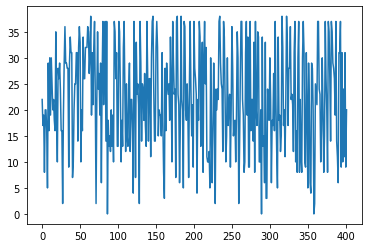

In [132]:
plt.plot(center_x)

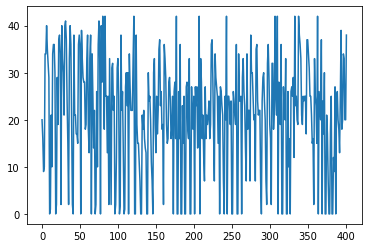

In [133]:
plt.plot(center_y)

In [148]:
###3 trying to combine contours and getting final combined moment 


### working code of the conoturs and moments with tracked rope 

path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"
img1 = r"C:\Users\ayush\Desktop\Jump Rope Code\JupyterEnvironment\jump.png"


# Open video file
cap = cv2.VideoCapture(path)

# Define window coordinates
x, y, w, h = 340, 340, 50, 50

import cv2
import mediapipe as mp
import numpy as np 

center_x = []
center_y = []

# Initialize the OpenPose model
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    while cap.isOpened():
        # Read the frame
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame with OpenPose to get the landmarks
        results = pose.process(frame_rgb)
        right_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX]
        left_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX]
        

        # If left index landmark is detected, draw the bounding rectangle around it
        if left_index.visibility > 0:
            left_index_x = int(left_index.x * frame.shape[1])
            left_index_y = int(left_index.y * frame.shape[0])
            cv2.rectangle(frame, (left_index_x - 10, left_index_y - 20),
                          (left_index_x + 30, left_index_y + 20), (0, 255, 0), 2)
            
            roi1 = frame[left_index_y - 20:left_index_y + 20, left_index_x - 10:left_index_x + 40]
            
        # If right index landmark is detected, draw the bounding rectangle around it
        if right_index.visibility > 0:
            right_index_x = int(right_index.x * frame.shape[1])
            right_index_y = int(right_index.y * frame.shape[0])
            cv2.rectangle(frame, (right_index_x - 25, right_index_y - 20),
                          (right_index_x + 20 , right_index_y + 20), (255, 0, 0), 2)
            
            roi2 = frame[right_index_y - 25:right_index_y + 20, right_index_x - 20:right_index_x + 20]
    
        # change the value of roi1 and roi2 accordingly to draw the contour
        # Convert to grayscale
        gray = cv2.cvtColor(roi1, cv2.COLOR_BGR2GRAY)
        
        edges = cv2.Canny(frame, 100, 200)
        # Threshold image
        ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, hierarchy = cv2.findContours(edges[right_index_y - 25:right_index_y + 20, right_index_x - 20:right_index_x + 20], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        cv2.drawContours(edges[right_index_y - 25:right_index_y + 20, right_index_x - 20:right_index_x + 20], contours,-1, (0, 0, 255), -1)
        
    #--------------------------------------------------------------------------------#
    
    
#         contours, hierarchy = cv2.findContours(window, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Calculate the moments of all contours and add them up
#         combined_moments = None
#         for contour in contours:
#             moments = cv2.moments(contour)
            
#             if combined_moments is None:
#                 combined_moments = moments
#             else:
#                 print(f"{moments}\n")
#                 print(combined_moments)
#                 combined_moments = cv2.add(combined_moments, moments)


#         print(combined_moments['m00'])
    
    
    #---------------------------------------------------------------------------------#
        

    
        # Calculate moments for each contour
        moments = [cv2.moments(cnt) for cnt in contours]

        # Combine moments of all contours within the window
        combined_moments = {}
        
        for m in moments:
            
            if m['m00'] == 0:
                continue  # avoid zero-division error
            cx = int(m['m10']/m['m00'])
            cy = int(m['m01']/m['m00'])
            center_x.append(cx)
            center_y.append(cy)
            
            cv2.circle(frame, (cx, cy), 1, (0, 0, 255), 3)
            
            for key, value in m.items():
                if key in combined_moments:
                    combined_moments[key] += value
                else:
                    combined_moments[key] = value

        # Print combined moments
#         print(combined_moments)

        # Display window
        cv2.imshow("frame",frame)
        cv2.imshow("roi2",roi2)
        cv2.imshow("roi1",roi1)
        

        # Wait for key press
        if cv2.waitKey(1000) & 0xFF == ord('q'):
            break

# Release video file and close window
cap.release()
cv2.destroyAllWindows()

{'m00': 1.0, 'm10': 22.0, 'm01': 20.5, 'm20': 484.16666666666663, 'm11': 451.0833333333333, 'm02': 420.3333333333333, 'm30': 10659.0, 'm21': 9929.083333333334, 'm12': 9250.75, 'm03': 8620.25, 'mu20': 0.16666666666662877, 'mu11': 0.08333333333331439, 'mu02': 0.08333333333331439, 'mu30': 1.8189894035458565e-12, 'mu21': 1.9895196601282805e-12, 'mu12': 1.0231815394945443e-12, 'mu03': 1.8189894035458565e-12, 'nu20': 0.16666666666662877, 'nu11': 0.08333333333331439, 'nu02': 0.08333333333331439, 'nu30': 1.8189894035458565e-12, 'nu21': 1.9895196601282805e-12, 'nu12': 1.0231815394945443e-12, 'nu03': 1.8189894035458565e-12}
{'m00': 1.5, 'm10': 26.666666666666664, 'm01': 24.166666666666664, 'm20': 474.75, 'm11': 430.4583333333333, 'm02': 391.91666666666663, 'm30': 8464.300000000001, 'm21': 7678.599999999999, 'm12': 6994.099999999999, 'm03': 6395.05, 'mu20': 0.6759259259260375, 'mu11': 0.828703703703809, 'mu02': 2.564814814814895, 'mu30': 0.26707818929935456, 'mu21': 0.3849794238654489, 'mu12': -0

In [28]:

######### contour placement and moments work with images and 
#----------------------------------------------------------------------


### working code of the conoturs and moments with tracked rope 

path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"
img1 = r"C:\Users\ayush\Desktop\Jump Rope Code\JupyterEnvironment\jump.png"




import cv2
import mediapipe as mp
import numpy as np 


# Open video file
cap = cv2.VideoCapture(path)

# Define window coordinates
x, y, w, h = 340, 340, 50, 50
center_x = []
center_y = []

total_area = 0
combined_centroid_x = 0
combined_centroid_y = 0


# Initialize the OpenPose model
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    while cap.isOpened():
        # Read the frame
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame with OpenPose to get the landmarks
        results = pose.process(frame_rgb)
        right_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX]
        left_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX]
        

        # If left index landmark is detected, draw the bounding rectangle around it
        if left_index.visibility > 0:
            left_index_x = int(left_index.x * frame.shape[1])
            left_index_y = int(left_index.y * frame.shape[0])
            cv2.rectangle(frame, (left_index_x - 10, left_index_y - 20),
                          (left_index_x + 30, left_index_y + 20), (0, 255, 0), 2)
            
            roi1 = frame[left_index_y - 20:left_index_y + 20, left_index_x - 10:left_index_x + 40]
            
        # If right index landmark is detected, draw the bounding rectangle around it
        if right_index.visibility > 0:
            right_index_x = int(right_index.x * frame.shape[1])
            right_index_y = int(right_index.y * frame.shape[0])
            cv2.rectangle(frame, (right_index_x - 25, right_index_y - 20),
                          (right_index_x + 20 , right_index_y + 20), (255, 0, 0), 2)
            
            roi2 = frame[right_index_y - 25:right_index_y + 20, right_index_x - 20:right_index_x + 20]
    
        # change the value of roi1 and roi2 accordingly to draw the contour
        # Convert to grayscale
        gray = cv2.cvtColor(roi1, cv2.COLOR_BGR2GRAY)
        
        # Threshold image
        ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        
        cv2.drawContours(roi1, contours,-1, (0, 0, 255), -1)
    
        for contour in contours:
            M = cv2.moments(contour)
            area = M['m00']
            
            if M['m00']==0:
                continue
            else:

                centroid_x = int(M['m10']/M['m00'])
                centroid_y = int(M['m01']/M['m00'])
                total_area += area
                combined_centroid_x += area * centroid_x
                combined_centroid_y += area * centroid_y
        
        
        
        if total_area!=0:
            
            combined_centroid_x = int(combined_centroid_x / total_area)
            combined_centroid_y = int(combined_centroid_y / total_area)
            print(total_area)
        
        cv2.circle(roi1, (left_index_x + combined_centroid_x, left_index_y + combined_centroid_y), 5, (0, 0, 255), -1)
        
        # Display window
        cv2.imshow("frame",frame)
        cv2.imshow("roi2",roi2)
        cv2.imshow("roi1",roi1)
        cv2.imshow("thresh index",thresh)

        # Wait for key press
        if cv2.waitKey(50) & 0xFF == ord('q'):
            break

# Release video file and close window
cap.release()
cv2.destroyAllWindows()



1167.0
2558.5
4109.0
6180.5
8246.0
10309.5
12400.0
14537.5
16737.5
18969.5
21195.0
23338.0
25461.5
27621.0
29764.5
31918.0
34053.5
36183.5
38287.5
40346.0
42362.0
44401.5
46548.0
48814.5
51086.0
53280.0
55426.0
57482.0
59506.0
61541.0


In [14]:
import cv2

# Load the image
image = cv2.imread(img1)

# Define the rectangular window (x, y, width, height)
x, y, w, h = 10, 220, 75, 75

# Crop the image to the rectangular window
image_cropped = image[y:y+h, x:x+w]

# Convert the cropped image to grayscale
gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

# Threshold the image
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate the combined centroid of all the contours
total_area = 0
combined_centroid_x = 0
combined_centroid_y = 0

for contour in contours:
    M = cv2.moments(contour)
    area = M['m00']
    if M['m00']==0:
        continue
    else:

        centroid_x = int(M['m10']/M['m00'])
        centroid_y = int(M['m01']/M['m00'])
        total_area += area
        combined_centroid_x += area * centroid_x
        combined_centroid_y += area * centroid_y

combined_centroid_x = int(combined_centroid_x / total_area)
combined_centroid_y = int(combined_centroid_y / total_area)

# Draw the rectangular window on the original image
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Draw the combined centroid on the original image
cv2.circle(image, (x + combined_centroid_x, y + combined_centroid_y), 5, (0, 0, 255), -1)

# Display the result
cv2.imshow('Result', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
import cv2

# Load the image
image = cv2.imread(img1)

# Define the rectangular window (x, y, width, height)
x, y, w, h = 10, 220, 75, 75

# Crop the image to the rectangular window
image_cropped = image[y:y+h, x:x+w]

# Convert the cropped image to grayscale
gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

# Threshold the image
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate the combined centroid of all the contours
total_area = 0
combined_centroid_x = 0
combined_centroid_y = 0

for contour in contours:
    M = cv2.moments(contour)
    area = M['m00']
    if M['m00']==0:
        continue
    else:

        centroid_x = int(M['m10']/M['m00'])
        centroid_y = int(M['m01']/M['m00'])
        total_area += area
        combined_centroid_x += area * centroid_x
        combined_centroid_y += area * centroid_y

combined_centroid_x = int(combined_centroid_x / total_area)
combined_centroid_y = int(combined_centroid_y / total_area)

# Draw the rectangular window on the original image
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Draw the combined centroid on the original image
cv2.circle(image, (x + combined_centroid_x, y + combined_centroid_y), 5, (0, 0, 255), -1)

# Display the result
cv2.imshow('Result', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [20]:
import cv2
import numpy as np

# Create a VideoCapture object to read from the video file
cap = cv2.VideoCapture(path)

# Define the rectangular window for contour detection
x, y, w, h = 320, 320, 75, 75

# Define the size and color of the circle to mark the centroid
circle_size = 4
circle_color = (0, 255, 0)

# Loop over the frames of the video
while True:
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break
    
    # Select the rectangular window for contour detection
    window = frame[y:y+h, x:x+w]
    
    # Convert the window to grayscale
    gray = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
    
    # Find contours in the window
    contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Calculate the combined centroid of all the contours in the window
    sum_x = 0
    sum_y = 0
    for contour in contours:
        M = cv2.moments(contour)
        centroid_x = int(M['m10']/M['m00'])
        centroid_y = int(M['m01']/M['m00'])
        sum_x += centroid_x
        sum_y += centroid_y
    if len(contours) > 0:
        avg_x = int(sum_x/len(contours))
        avg_y = int(sum_y/len(contours))
    else:
        avg_x = int(x + w/2)
        avg_y = int(y + h/2)
    
    # Draw a small circle at the combined centroid position
    cv2.circle(frame, (x+avg_x, y+avg_y), circle_size, circle_color, -1)
    
    # Display the frame with the marked centroid
    cv2.imshow('Frame', frame)
    cv2.imshow("rect",window)
    
    # Wait for a key press and check if the user wants to quit
    key = cv2.waitKey(100) & 0xFF
    if key == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


In [38]:
################################################## working working working WORKINGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG 
############## OMG AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA MAZZE HO GAYE BC WOW AAAO MAZZE HO GAYE AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

path7=r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g08_c07.avi"



import cv2
import numpy as np

# Open the video file
cap = cv2.VideoCapture(path7)

# Define the rectangular window where the contours will be detected
x, y, w, h = 100, 75, 50, 50

# Create a window to display the video and the centroid
cv2.namedWindow('Window')
cxlist = []
cylist = []
while True:
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break
    
    # Crop the frame to the rectangular window
    window = frame[y:y+h, x:x+w]
    
    # Convert the window to grayscale
    gray = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
    
    # Apply a threshold to create a binary image
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find the contours in the binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # If there are any contours found
    if len(contours) > 0:
        # Calculate the combined centroid of all the contours
        cx = 0
        cy = 0
        total_area = 0
        for contour in contours:
            
            area = cv2.contourArea(contour)
            M = cv2.moments(contour)
            if M['m00'] !=0:
                cx += int(M['m10']/M['m00']) * area
                cy += int(M['m01']/M['m00']) * area
            total_area += area
            
        cx = int(cx/total_area)
        cy = int(cy/total_area)
        cxlist.append(cx)
        cylist.append(cy)
        
        # Draw a small circle at the centroid position
        cv2.circle(window, (cx, cy), 3, (0, 255, 0), -1)
        cv2.drawContours(window, contours,-1, (0, 0, 255), -1)
        
        
    # Display the window with the video and the centroid
    cv2.imshow('Window', frame)
    cv2.imshow("Designated window",window)
    
    # Exit if the user presses the 'q' key
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

# Release the video capture and close the window
cap.release()
cv2.destroyAllWindows()


In [36]:
counter = 0 
        

        # Initialize a variable to keep track of the minimum value seen so far
min_value = None

# Get the first reading from the sensor
readings = cylist

for i in range(1, len(readings)):
    # Get the current and previous readings
    current_reading = readings[i]
    previous_reading = readings[i-1]

    # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
    if current_reading < previous_reading and (min_value is None or current_reading < min_value):
        min_value = current_reading

    # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
    elif min_value is not None:
        counter += 1
        min_value = None

        
        
print(counter//2 + 1)

6


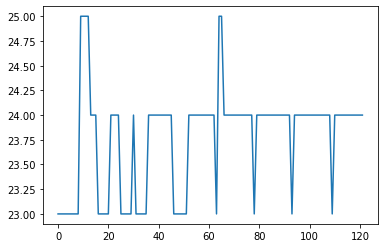

In [37]:
import matplotlib.pyplot as plt
plt.plot(cylist)

In [41]:
################################################## working working working WORKINGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG 
############## OMG AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA MAZZE HO GAYE BC WOW AAAO MAZZE HO GAYE AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

path7=r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g08_c07.avi"



import cv2
import numpy as np

# Open the video file
cap = cv2.VideoCapture(path1)

# Define the rectangular window where the contours will be detected
x, y, w, h = 325, 120, 50, 50

# Create a window to display the video and the centroid
cv2.namedWindow('Window')
cxlist = []
cylist = []
while True:
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break
    
    # Crop the frame to the rectangular window
    window = frame[y:y+h, x:x+w]
    
    # Convert the window to grayscale
    gray = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
    
    # Apply a threshold to create a binary image
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find the contours in the binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # If there are any contours found
    if len(contours) > 0:
        # Calculate the combined centroid of all the contours
        cx = 0
        cy = 0
        total_area = 0
        for contour in contours:
            
            area = cv2.contourArea(contour)
            M = cv2.moments(contour)
            if M['m00'] !=0:
                cx += int(M['m10']/M['m00']) * area
                cy += int(M['m01']/M['m00']) * area
            total_area += area
            
        cx = int(cx/total_area)
        cy = int(cy/total_area)
        cxlist.append(cx)
        cylist.append(cy)
        
        # Draw a small circle at the centroid position
        cv2.circle(window, (cx, cy), 3, (0, 255, 0), -1)
        cv2.drawContours(window, contours,-1, (0, 0, 255), -1)
        
        
    # Display the window with the video and the centroid
    cv2.imshow('Window', frame)
    cv2.imshow("Designated window",window)
    
    # Exit if the user presses the 'q' key
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

# Release the video capture and close the window
cap.release()
cv2.destroyAllWindows()


11


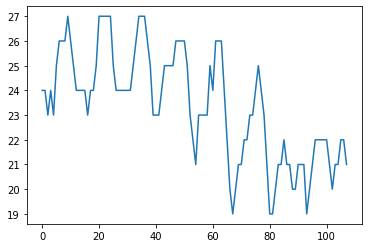

In [48]:
counter = 0 
        

        # Initialize a variable to keep track of the minimum value seen so far
min_value = None

# Get the first reading from the sensor
readings = cylist

for i in range(1, len(readings)):
    # Get the current and previous readings
    current_reading = readings[i]
    previous_reading = readings[i-1]

    # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
    if current_reading < previous_reading and (min_value is None or current_reading < min_value):
        min_value = current_reading

    # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
    elif min_value is not None:
        counter += 1
        min_value = None

        
        
print(counter//2 + 1)


plt.plot(jumpman8)

11


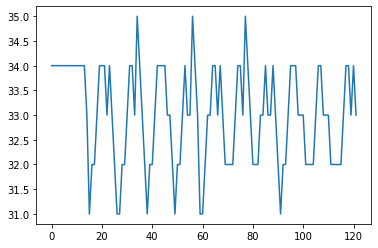

In [47]:
################################################## working working working WORKINGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG 
############## OMG AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA MAZZE HO GAYE BC WOW AAAO MAZZE HO GAYE AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


import cv2
import numpy as np

# Open the video file
cap = cv2.VideoCapture(path)

# Define the rectangular window where the contours will be detected
x, y, w, h = 340, 330, 50, 70

# Create a window to display the video and the centroid
cv2.namedWindow('Window')
cxlist = []
cylist = []
while True:
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break
    
    # Crop the frame to the rectangular window
    window = frame[y:y+h, x:x+w]
    
    # Convert the window to grayscale
    gray = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
    
    # Apply a threshold to create a binary image
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find the contours in the binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # If there are any contours found
    if len(contours) > 0:
        # Calculate the combined centroid of all the contours
        cx = 0
        cy = 0
        total_area = 0
        for contour in contours:
            
            area = cv2.contourArea(contour)
            M = cv2.moments(contour)
            if M['m00'] !=0:
                cx += int(M['m10']/M['m00']) * area
                cy += int(M['m01']/M['m00']) * area
            total_area += area
            
        cx = int(cx/total_area)
        cy = int(cy/total_area)
        cxlist.append(cx)
        cylist.append(cy)
        
        # Draw a small circle at the centroid position
        cv2.circle(window, (cx, cy), 3, (0, 255, 0), -1)
        cv2.drawContours(window, contours,-1, (0, 0, 255), -1)
        
        
    # Display the window with the video and the centroid
    cv2.imshow('Window', frame)
    cv2.imshow("Designated window",window)
    
    # Exit if the user presses the 'q' key
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

# Release the video capture and close the window
cap.release()
cv2.destroyAllWindows()


### making a live video feed being displayed as the signals come in 

In [51]:
'''
tracking the wrist and have them in a frame
get to see the difference image formed within these windows

'''

path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"


## Imports 
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2
import time
import random
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []
left_wrist_y = []
left_wrist_x = []
right_wrist_x = []
right_wrist_y = []
differenc_wrist_r = []
difference_ankle_r = []
left_foot_y = []
right_foot_y = []
left_heel_y = []
right_heel_y = []


cap = cv2.VideoCapture(path)

if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        # Recolor image to RGB
       
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)            
            right_hip_y.append(landmarks[23].y)            
            left_hip_y.append(landmarks[24].y)
            left_wrist_y.append(landmarks[15].y)
            left_wrist_x.append(landmarks[15].x)
            right_wrist_y.append(landmarks[16].y)
            right_wrist_x.append(landmarks[16].x)
            left_heel_y.append(landmarks[29].y)
            right_heel_y.append(landmarks[30].y)
            left_foot_y.append(landmarks[31].y)
            right_foot_y.append(landmarks[32].y)
            
        except:
            pass


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               

    ###obtaining the right and left hand positions and subsequently marking them on the video feed.
    
        right_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]
        left_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST]
        
    
        
        
        # If left wrist landmark is detected, draw the bounding rectangle around it
        if left_wrist.visibility > 0:
            left_wrist_x = int(left_wrist.x * frame.shape[1])
            left_wrist_y = int(left_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (left_wrist_x - 30, left_wrist_y - 30),
                          (left_wrist_x + 40, left_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi1 = frame[left_wrist_y - 30:left_wrist_y + 30, left_wrist_x - 30:left_wrist_x + 40]
            except : 
                roi1 = frame[200:280,200:280]


            ##If right wrist landmark is detected, draw the bounding rectangle around it
        if right_wrist.visibility > 0:
            right_wrist_x = int(right_wrist.x * frame.shape[1])
            right_wrist_y = int(right_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (right_wrist_x - 40, right_wrist_y - 30),
                          (right_wrist_x + 30 , right_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi2 = frame[right_wrist_y - 30:right_wrist_y + 30, right_wrist_x - 30:right_wrist_x + 30]
            except: 
                roi2 = frame[200:280,200:280]

        
        counter = 0 
        

        # Initialize a variable to keep track of the minimum value seen so far
        min_value = None

        # Get the first reading from the sensor
        readings = left_ankle_y

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
            if current_reading < previous_reading and (min_value is None or current_reading < min_value):
                min_value = current_reading

            # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
            elif min_value is not None:
                counter += 1
                min_value = None

#### finding difference of frames and showing them below in new windwos
    
        
        


#         # Initialize the plot
#         plt.ion()  # Turn on interactive mode
#         fig, ax = plt.subplots()
#         line, = ax.plot([], [], 'b-')
#         ax.set_xlim(0, 10)
#         ax.set_ylim(0, 100)
#         ax.set_xlabel('Time')
#         ax.set_ylabel('Sensor Data')
#         fig.canvas.draw()

#         # Initialize the sensor data
#         sensor_data = left_ankle_y
        
#         # Main loop
#         while True:
#             # Update the plot
#             line.set_xdata(range(len(sensor_data)))
#             line.set_ydata(sensor_data)
#             ax.relim()
#             ax.autoscale_view()
#             fig.canvas.draw()
#             fig.canvas.flush_events()

#             #Wait for a short amount of time before updating again
#             time.sleep(0.1)

        cv2.imshow('Mediapipe Feed', image)
        cv2.imshow("RightWristCam", roi1)
        cv2.imshow("LeftWristCam",roi2)
        
        
        
        if cv2.waitKey(40) & 0xFF == ord('q'):
            break
                
        if ret ==False:
            break
        
    print(f"the final counter reading is : {counter}") 
    cap.release()
    cv2.destroyAllWindows()

the final counter reading is : 11


Final counter reading is: 11


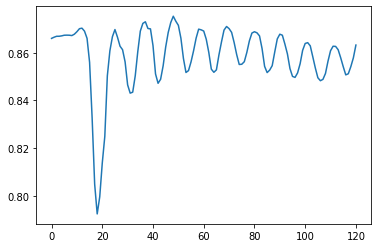

In [63]:
counter = 0 
        

# Initialize a variable to keep track of the minimum value seen so far
min_value = None

# Get the first reading from the sensor
readings = left_ankle_y

for i in range(1, len(readings)):
    # Get the current and previous readings
    current_reading = readings[i]
    previous_reading = readings[i-1]

    # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
    if current_reading < previous_reading and (min_value is None or current_reading < min_value):
        min_value = current_reading

    # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
    elif min_value is not None:
        counter += 1
        min_value = None
                
print (f"Final counter reading is: {counter}")
plt.plot(left_ankle_y)


11


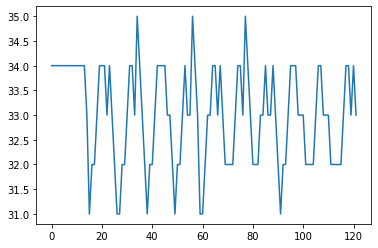

In [57]:
counter = 0 
        

        # Initialize a variable to keep track of the minimum value seen so far
min_value = None

# Get the first reading from the sensor
readings = cylist

for i in range(1, len(readings)):
    # Get the current and previous readings
    current_reading = readings[i]
    previous_reading = readings[i-1]

    # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
    if current_reading < previous_reading and (min_value is None or current_reading < min_value):
        min_value = current_reading

    # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
    elif min_value is not None:
        counter += 1
        min_value = None

        
        
print(counter//2 + 1)

plt.plot(cylist)

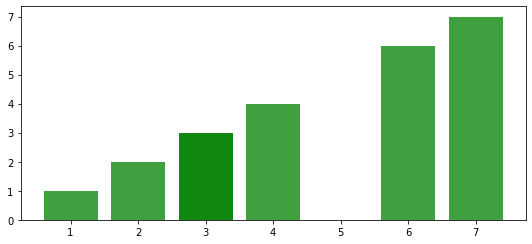

In [64]:

import numpy as np
from matplotlib import animation as animation, pyplot as plt, cm

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()

data = [1, 4, 3, 2, 6, 7, 3]
colors = ['red', 'yellow', 'blue', 'green', 'black']
bars = plt.bar(data, data, facecolor='green', alpha=0.75)

def animate(frame):
   global bars
   index = np.random.randint(1, 7)
   bars[frame].set_height(index)
   bars[frame].set_facecolor(colors[np.random.randint(0, len(colors))])

ani = animation.FuncAnimation(fig, animate, frames=len(data))

plt.show()

In [66]:
pip install tmp102


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tmp102 (from versions: none)
ERROR: No matching distribution found for tmp102


In [69]:
import smbus

# Module variables
i2c_ch = 1
bus = None

# TMP102 address on the I2C bus
i2c_address = 0x48

# Register addresses
reg_temp = 0x00
reg_config = 0x01

# Calculate the 2's complement of a number
def twos_comp(val, bits):
    if (val & (1 << (bits - 1))) != 0:
        val = val - (1 << bits)
    return val

# Read temperature registers and calculate Celsius
def read_temp():

    global bus

    # Read temperature registers
    val = bus.read_i2c_block_data(i2c_address, reg_temp, 2)
    temp_c = (val[0] << 4) | (val[1] >> 4)

    # Convert to 2s complement (temperatures can be negative)
    temp_c = twos_comp(temp_c, 12)

    # Convert registers value to temperature (C)
    temp_c = temp_c * 0.0625

    return temp_c

# Initialize communications with the TMP102
def init():

    global bus

    # Initialize I2C (SMBus)
    bus = smbus.SMBus(i2c_ch)

    # Read the CONFIG register (2 bytes)
    val = bus.read_i2c_block_data(i2c_address, reg_config, 2)

    # Set to 4 Hz sampling (CR1, CR0 = 0b10)
    val[1] = val[1] & 0b00111111
    val[1] = val[1] | (0b10 << 6)

    # Write 4 Hz sampling back to CONFIG
    bus.write_i2c_block_data(i2c_address, reg_config, val)

    # Read CONFIG to verify that we changed it
    val = bus.read_i2c_block_data(i2c_address, reg_config, 2)


ModuleNotFoundError: No module named 'smbus'

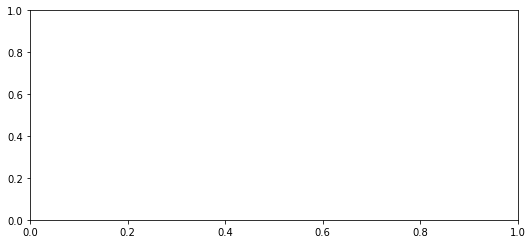

[]


<function print>

In [76]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = []
ys = []


# This function is called periodically from FuncAnimation
def animate(i, xs, ys):
    
    
    # Read temperature (Celsius) from TMP102
    temp_c = left_ankle_y

    # Add x and y to lists
    xs.append(dt.datetime.now().strftime('%H:%M:%S.%f'))
    ys.append(temp_c)
    

    # Limit x and y lists to 20 items
    xs = xs[-20:]
    ys = ys[-20:]

    # Draw x and y lists
    ax.clear()
    ax.plot(xs, ys)

    # Format plot
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)
    plt.title('TMP102 Temperature over Time')
    plt.ylabel('Temperature (deg C)')

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, fargs=(xs, ys), interval=1000)
plt.show()



### Task list :

* track the moments in relation to the writsts using mediapipes pose estimation model 
* get live charts of ankle and rope mvmnt 
* add live tracker on the video and increase counter as they are encountered. 
* combine rope logic and ankle jump logic 
* get count addition which works when combined with the logic of ankle and rope 


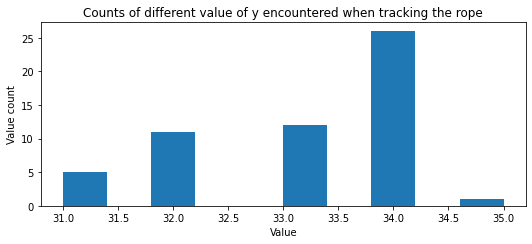

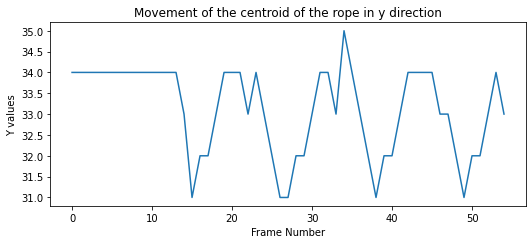

Number of jumps calculated when the rope is being tracked is 4
The different values encountered and their counts are as follows:
34    32
33    20
32    16
31     7
35     2
dtype: int64


In [121]:
################################################## working working working WORKINGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG 
############## OMG AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA MAZZE HO GAYE BC WOW AAAO MAZZE HO GAYE AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


import cv2
import numpy as np

# Open the video file
cap = cv2.VideoCapture(path)

# Define the rectangular window where the contours will be detected
x, y, w, h = 340, 330, 50, 70

# Create a window to display the video and the centroid
cv2.namedWindow('Window')
cxlist = []
cylist = []
while True:
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break
    
    # Crop the frame to the rectangular window
    window = frame[y:y+h, x:x+w]
    
    # Convert the window to grayscale
    gray = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
    
    # Apply a threshold to create a binary image
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find the contours in the binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # If there are any contours found
    if len(contours) > 0:
        # Calculate the combined centroid of all the contours
        cx = 0
        cy = 0
        total_area = 0
        for contour in contours:
            
            area = cv2.contourArea(contour)
            M = cv2.moments(contour)
            if M['m00'] !=0:
                cx += int(M['m10']/M['m00']) * area
                cy += int(M['m01']/M['m00']) * area
            total_area += area
            
        cx = int(cx/total_area)
        cy = int(cy/total_area)
        cxlist.append(cx)
        cylist.append(cy)
        
        # Draw a small circle at the centroid position
        cv2.circle(window, (cx, cy), 3, (0, 255, 0), -1)
        cv2.drawContours(window, contours,-1, (0, 0, 255), -1)
        
        
        counter = 0 
        

                # Initialize a variable to keep track of the minimum value seen so far
        min_value = None

        # Get the first reading from the sensor
        readings = cylist

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
            if current_reading < previous_reading and (min_value is None or current_reading < min_value):
                min_value = current_reading

            # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
            elif min_value is not None:
                counter += 1
                min_value = None

    # Display the window with the video and the centroid
    cv2.imshow('Window', frame)
    cv2.imshow("Designated window",window)
    
    # Exit if the user presses the 'q' key
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

# Release the video capture and close the window
cap.release()
cv2.destroyAllWindows()


#plotting device


plt.hist(cylist)
plt.title("Counts of different value of y encountered when tracking the rope")
plt.ylabel("Value count")
plt.xlabel('Value')
plt.show()

plt.plot(cylist)
plt.title("Movement of the centroid of the rope in y direction")
plt.ylabel("Y values")
plt.xlabel("Frame Number")
plt.show()



        
print(f"Number of jumps calculated when the rope is being tracked is {counter//2 + 1}")

print(f"The different values encountered and their counts are as follows:\n{cylist_df.value_counts()}")




### making a live video feed being displayed as the signals come in 

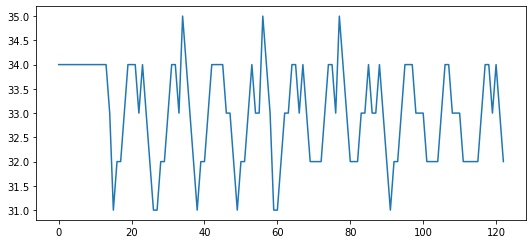

In [105]:
plt.plot(cylist)

11


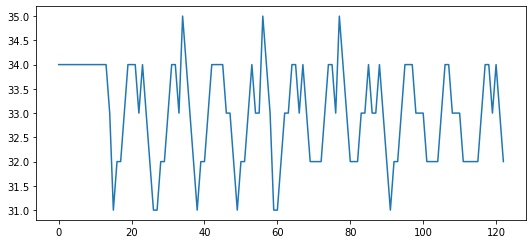

In [106]:
counter = 0 
        

        # Initialize a variable to keep track of the minimum value seen so far
min_value = None

# Get the first reading from the sensor
readings = cylist

for i in range(1, len(readings)):
    # Get the current and previous readings
    current_reading = readings[i]
    previous_reading = readings[i-1]

    # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
    if current_reading < previous_reading and (min_value is None or current_reading < min_value):
        min_value = current_reading

    # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
    elif min_value is not None:
        counter += 1
        min_value = None

        
        
print(counter//2 + 1)

plt.plot(cylist)

In [88]:
from collections import Counter 
Counter(cylist)

Counter({34: 38, 33: 29, 31: 8, 32: 22, 35: 3})

In [91]:
import pandas as pd 

cylist_df = pd.DataFrame(cylist)

AttributeError: 'list' object has no attribute 'hist'

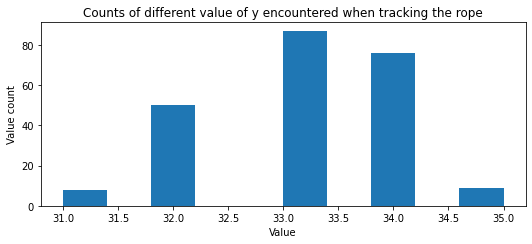

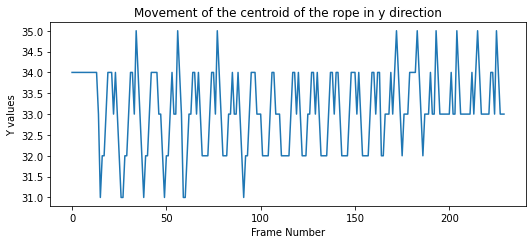

Number of jumps calculated when the rope is being tracked is 21
The different values encountered and their counts are as follows:
Counter({33: 87, 34: 76, 32: 50, 35: 9, 31: 8})


230

In [125]:
################################################## working working working WORKINGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG 
############## OMG AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA MAZZE HO GAYE BC WOW AAAO MAZZE HO GAYE AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


import cv2
import numpy as np

# Open the video file
cap = cv2.VideoCapture(path)

# Define the rectangular window where the contours will be detected
x, y, w, h = 340, 330, 50, 70

# Create a window to display the video and the centroid
cv2.namedWindow('Window')
cxlist = []
cylist = []
while True:
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break
    
    # Crop the frame to the rectangular window
    window = frame[y:y+h, x:x+w]
    
    # Convert the window to grayscale
    gray = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
    
    # Apply a threshold to create a binary image
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find the contours in the binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # If there are any contours found
    if len(contours) > 0:
        # Calculate the combined centroid of all the contours
        cx = 0
        cy = 0
        total_area = 0
        for contour in contours:
            
            area = cv2.contourArea(contour)
            M = cv2.moments(contour)
            if M['m00'] !=0:
                cx += int(M['m10']/M['m00']) * area
                cy += int(M['m01']/M['m00']) * area
            total_area += area
            
        cx = int(cx/total_area)
        cy = int(cy/total_area)
        cxlist.append(cx)
        cylist.append(cy)
        
        # Draw a small circle at the centroid position
        cv2.circle(window, (cx, cy), 3, (0, 255, 0), -1)
        cv2.drawContours(window, contours,-1, (0, 0, 255), -1)
        
        
        counter = 0 
        

                # Initialize a variable to keep track of the minimum value seen so far
        min_value = None

        # Get the first reading from the sensor
        readings = cylist

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
            if current_reading < previous_reading and (min_value is None or current_reading < min_value):
                min_value = current_reading

            # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
            elif min_value is not None:
                counter += 1
                min_value = None

    # Display the window with the video and the centroid
    cv2.imshow('Window', frame)
    cv2.imshow("Designated window",window)
    
    # Exit if the user presses the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close the window
cap.release()
cv2.destroyAllWindows()


#plotting device


plt.hist(cylist)
plt.title("Counts of different value of y encountered when tracking the rope")
plt.ylabel("Value count")
plt.xlabel('Value')
plt.show()

plt.plot(cylist)
plt.title("Movement of the centroid of the rope in y direction")
plt.ylabel("Y values")
plt.xlabel("Frame Number")
plt.show()



        
print(f"Number of jumps calculated when the rope is being tracked is {counter//2 + 1}")

print(f"The different values encountered and their counts are as follows:\n{Counter(cylist)}")

len(cylist)


### making a live video feed being displayed as the signals come in 

the final counter reading from the left ankle is : 8
the final counter reading from the right ankle is : 6
the final counter reading from the rope in left hand is : 8
the final counter reading from the rope in right hand is : 15
rope maxima indices for left hand are as follows: [3, 17, 32, 36, 45, 50, 59, 72]
rope maxima indices for right hand are as follows: [7, 9, 14, 20, 27, 30, 34, 37, 40, 44, 46, 53, 60, 67, 73]
ankle minima indices are as follows: [4, 18, 32, 40, 45, 47, 59, 73]


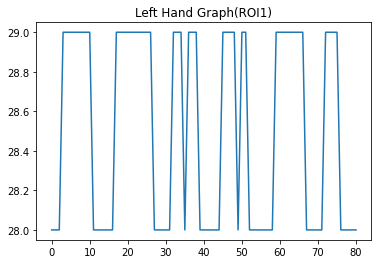

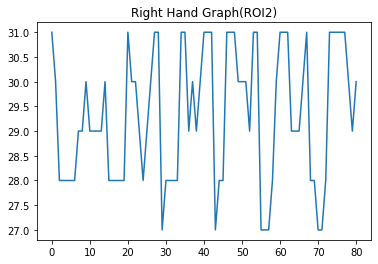

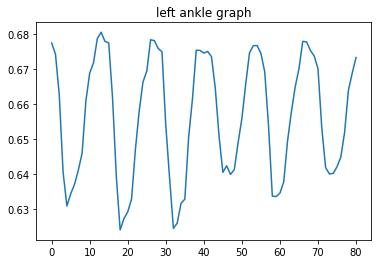

<function matplotlib.pyplot.show(close=None, block=None)>

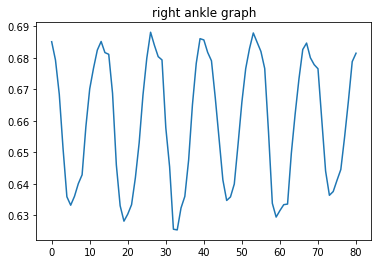

In [1]:
'''
tracking the wrist and have them in a frame
get to see the difference image formed within these windows

'''

path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"


## Imports 
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2
import time
import random
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []
left_wrist_y = []
left_wrist_x = []
right_wrist_x = []
right_wrist_y = []
differenc_wrist_r = []
difference_ankle_r = []
left_foot_y = []
right_foot_y = []
left_heel_y = []
right_heel_y = []


cxlist_roi1 = []
cylist_roi1 = []
cxlist_roi2 = []
cylist_roi2 = []


cap = cv2.VideoCapture(path1)

if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        # Recolor image to RGB
       
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)            
            right_hip_y.append(landmarks[23].y)            
            left_hip_y.append(landmarks[24].y)
            left_wrist_y.append(landmarks[15].y)
            left_wrist_x.append(landmarks[15].x)
            right_wrist_y.append(landmarks[16].y)
            right_wrist_x.append(landmarks[16].x)
            left_heel_y.append(landmarks[29].y)
            right_heel_y.append(landmarks[30].y)
            left_foot_y.append(landmarks[31].y)
            right_foot_y.append(landmarks[32].y)
            
        except:
            pass


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               

    ###obtaining the right and left hand positions and subsequently marking them on the video feed.
    
        right_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]
        left_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST]
        
    
        
        
        # If left wrist landmark is detected, draw the bounding rectangle around it
        if left_wrist.visibility > 0:
            left_wrist_x = int(left_wrist.x * frame.shape[1])
            left_wrist_y = int(left_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (left_wrist_x - 30, left_wrist_y - 30),
                          (left_wrist_x + 40, left_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi1 = frame[left_wrist_y - 30:left_wrist_y + 30, left_wrist_x - 30:left_wrist_x + 40]
            except : 
                roi1 = frame[200:280,200:280]


            ##If right wrist landmark is detected, draw the bounding rectangle around it
        if right_wrist.visibility > 0:
            right_wrist_x = int(right_wrist.x * frame.shape[1])
            right_wrist_y = int(right_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (right_wrist_x - 40, right_wrist_y - 30),
                          (right_wrist_x + 30 , right_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi2 = frame[right_wrist_y - 30:right_wrist_y + 30, right_wrist_x - 30:right_wrist_x + 30]
            except: 
                roi2 = frame[200:280,200:280]

       
    ##### counter logic for finding the minimas at the ankles 
    
        ankle_counter = 0 
        
        ankle_minima_indice = []
        # Initialize a variable to keep track of the minimum value seen so far
        min_value = None

        # Get the first reading from the sensor
        readings = left_ankle_y

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
            if current_reading < previous_reading and (min_value is None or current_reading < min_value):
                min_value = current_reading

            # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
            elif min_value is not None:
                ankle_counter += 1
                min_value = None
                ankle_minima_indice.append(i-1)
                
    
        ### start of the section of rope detection of the roi1
        #converting the desired window to grayscale
        gray = cv2.cvtColor(roi1,cv2.COLOR_BGR2GRAY)
        
        # applying threshold to binary image 
        ret, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
        
        #contours and hierarchy
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        
        
        # If there are any contours found
        if len(contours) > 0:
            # Calculate the combined centroid of all the contours
            cx_roi1 = 0
            cy_roi1 = 0
            total_area = 0
            for contour in contours:

                area = cv2.contourArea(contour)
                
                M = cv2.moments(contour)
                if M['m00'] !=0:
                    cx_roi1 += int(M['m10']/M['m00']) * area
                    cy_roi1 += int(M['m01']/M['m00']) * area
                total_area += area

            cx_roi1 = int(cx_roi1/total_area)
            cy_roi1 = int(cy_roi1/total_area)
            cxlist_roi1.append(cx_roi1)
            cylist_roi1.append(cy_roi1)
            
            # Draw a small circle at the centroid position
            cv2.circle(roi1, (cx_roi1, cy_roi1), 3, (0, 255, 0), -1)
            cv2.drawContours(roi1, contours,-1, (0, 0, 255), -1)

            
        ### start of the section of rope detection of the roi2
        #converting the desired window to grayscale
        gray1 = cv2.cvtColor(roi2,cv2.COLOR_BGR2GRAY)
        
        # applying threshold to binary image 
        ret1, thresh1 = cv2.threshold(gray1,127,255,cv2.THRESH_BINARY)
        
        #contours and hierarchy
        contours1, hierarchy1 = cv2.findContours(thresh1, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        
        # If there are any contours found
        if len(contours1) > 0:
            # Calculate the combined centroid of all the contours
            cx_roi2 = 0
            cy_roi2 = 0
            total_area_2 = 0
            for contour in contours1:

                area = cv2.contourArea(contour)
                M = cv2.moments(contour)
                if M['m00'] !=0:
                    cx_roi2 += int(M['m10']/M['m00']) * area
                    cy_roi2 += int(M['m01']/M['m00']) * area
                total_area_2 += area

            cx_roi2 = int(cx_roi2/total_area_2)
            cy_roi2 = int(cy_roi2/total_area_2)
            cxlist_roi2.append(cx_roi2)
            cylist_roi2.append(cy_roi2)
            
            # Draw a small circle at the centroid position
            cv2.circle(roi2, (cx_roi2, cy_roi2), 3, (0, 255, 0), -1)
            cv2.drawContours(roi2, contours1,-1, (0, 0, 255), -1)

        
        ##### counter logic for looking at the number of jumps produced by looking at the hands
         # Initialize a counter to keep track of the number of local maximas encountered
        rope_counter_roi2 = 0 

        # Initialize a variable to keep track of the maximum value seen so far
        max_value = None

        # Get the first reading from the sensor
        readings = cylist_roi2
        
        # get the indices of maximas and when they're encountered
        rope_maxima_roi2_indices = []
        

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is greater than the previous reading and greater than the maximum value seen so far, update the maximum value
            if current_reading > previous_reading and (max_value is None or current_reading > max_value):
                max_value = current_reading

            # If the current reading is less than or equal to the previous reading and the maximum value has been updated, increment the counter and reset the maximum value
            elif max_value is not None:
                rope_counter_roi2 += 1
                max_value = None
                rope_maxima_roi2_indices.append(i - 1)
        
        
        
        
        
        # Initialize a counter to keep track of the number of local maximas encountered
        rope_counter_roi1 = 0 

        # Initialize a variable to keep track of the maximum value seen so far
        max_value = None

        # Get the first reading from the sensor
        readings = cylist_roi1
        
        # get the indices of maximas and when they're encountered
        rope_maxima_roi1_indices = []
        

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is greater than the previous reading and greater than the maximum value seen so far, update the maximum value
            if current_reading > previous_reading and (max_value is None or current_reading > max_value):
                max_value = current_reading

            # If the current reading is less than or equal to the previous reading and the maximum value has been updated, increment the counter and reset the maximum value
            elif max_value is not None:
                rope_counter_roi1 += 1
                max_value = None
                rope_maxima_roi1_indices.append(i - 1)
        
        
        cv2.imshow('Mediapipe Feed', image)
        cv2.imshow("LeftWristCam", roi1)
        cv2.imshow("RightWristCam",roi2)
        
        
        
        if cv2.waitKey(20) & 0xFF == ord('q'):
            break
                
        if ret ==False:
            break
        
    print(f"the final counter reading from the left ankle is : {ankle_counter}")
    print(f"the final counter reading from the right ankle is : {len(argrelmin(np.array(right_ankle_y))[0])}")
    print(f"the final counter reading from the rope in left hand is : {rope_counter_roi1}")
    print(f"the final counter reading from the rope in right hand is : {rope_counter_roi2}")
    print(f"rope maxima indices for left hand are as follows: {rope_maxima_roi1_indices}")
    print(f"rope maxima indices for right hand are as follows: {rope_maxima_roi2_indices}")
    print(f"ankle minima indices are as follows: {ankle_minima_indice}")
    
    cap.release()
    cv2.destroyAllWindows()
    
    
plt.plot(cylist_roi1)
plt.title("Left Hand Graph(ROI1)")
plt.show()

plt.plot(cylist_roi2)
plt.title("Right Hand Graph(ROI2)")
plt.show()


plt.plot(left_ankle_y)
plt.title("left ankle graph")
plt.show()

plt.plot(right_ankle_y)
plt.title("right ankle graph")
plt.show






Number of jumps when tracking y axis of left Ankle is 25
[  4  18  32  40  45  47  59  73  86 101 114 123 128 142 156 162 168 183
 196 209 223 236 249 263 277]


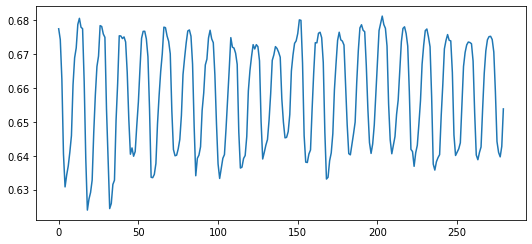

In [177]:
plt.plot(left_ankle_y)
print (f'Number of jumps when tracking y axis of left Ankle is {len(argrelmin(np.array(left_ankle_y))[0])}')
print(argrelmin(np.array(left_ankle_y))[0])

In [195]:
import plotly.express as px
import numpy as np
import pandas as pd

fig=px.line(left_ankle_y)
# Add range slider
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True),
                             type="linear",title="left ankle slider"))


fig.show()

# fig=px.line(cylist_roi2)
# # Add range slider
# fig.update_layout(xaxis=dict(rangeslider=dict(visible=True),
#                             type="linear",title = "right hand rope tracking"))


# fig.show()
print(argrelmin(np.array(left_ankle_y))[0])
print(f"the number of jumps examined are {len(argrelmin(np.array(left_ankle_y))[0])}")

# print(len(rope_maxima_roi2_indices)//2+1)

[  8  18  31  42  53  64  74  85  96 106 116 127 137 148 158 169 179 190
 200 211 222]
the number of jumps examined are 21


In [202]:
difference_array = []

for i in range(len(argrelmin(np.array(left_ankle_y))[0])):
    difference_array.append((argrelmin(np.array(left_ankle_y))[0][i])-(argrelmin(np.array(left_ankle_y))[0][i-1]))
    
print(difference_array)

[-214, 10, 13, 11, 11, 11, 10, 11, 11, 10, 10, 11, 10, 11, 10, 11, 10, 11, 10, 11, 11]


In [4]:
# High Knee jumps 

In [ ]:
# detections made for high knee jumps 
# fails for path 5 video, because of the angle at which that video is recorded and the final counter seems to 
# rise because of the angle set 

pathknee = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\KneeJumps.mp4"


cap = cv2.VideoCapture(pathknee)

# Curl counter variables
counter = 0 
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        frame_number = cap.get(cv2.CAP_PROP_POS_FRAMES)
#         print(int(frame_number))
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            
            # Calculate angle
            angle = calculate_angle(hip, knee, ankle)
            
            # Visualize angle
#             cv2.putText(image, str(angle), 
#                            tuple(np.multiply(elbow, [640, 480]).astype(int)), 
#                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
#                                 )
            
            # Curl counter logic
            if angle <160 :
                stage = "down"
            if angle > 160 and stage =='down':
                stage="up"
                counter +=1
                print(counter)
                       
        except:
            pass
        
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
#         frame data
        cv2.putText(image, 'Frame', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(int(frame_number)), 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

179.24819473845193


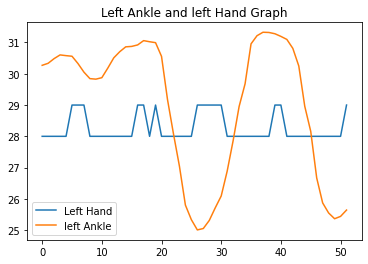

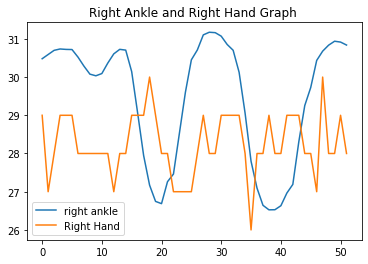

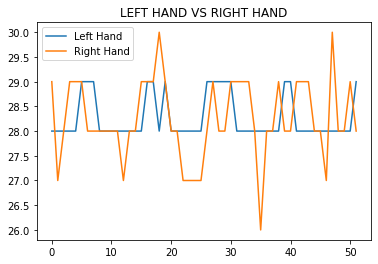

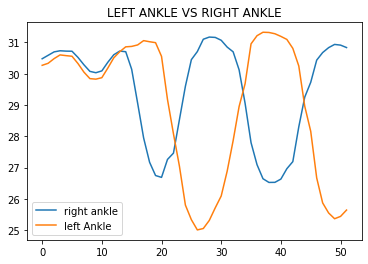

the final counter reading from the left ankle is : 3
the final counter reading from the right ankle is : 3
the final counter reading from the rope in left hand is : 5
the final counter reading from the rope in right hand is : 11
rope maxima indices for left hand are as follows: [5, 16, 19, 26, 39]
rope maxima indices for right hand are as follows: [3, 13, 15, 18, 27, 30, 36, 38, 41, 47, 50]
ankle minima indices are as follows: [9, 26, 49]


In [20]:
'''
tracking the wrist and have them in a frame
get to see the difference image formed within these windows

'''

path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"
path3 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g24_c01.avi"
path4 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g17_c05.avi"
path5 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g08_c01.avi"
path6 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g02_c01.avi"
pathknee = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\KneeJumps.mp4"


## Imports 
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2
import time
import random
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []
left_wrist_y = []
left_wrist_x = []
right_wrist_x = []
right_wrist_y = []
differenc_wrist_r = []
difference_ankle_r = []
left_foot_y = []
right_foot_y = []
left_heel_y = []
right_heel_y = []


cxlist_roi1 = []
cylist_roi1 = []
cxlist_roi2 = []
cylist_roi2 = []

Knee_counter = 0 
KneePosition = None 

def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 



cap = cv2.VideoCapture(pathknee)

if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        # Recolor image to RGB
       
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        frame_number = cap.get(cv2.CAP_PROP_POS_FRAMES)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            
            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)            
            right_hip_y.append(landmarks[23].y)            
            left_hip_y.append(landmarks[24].y)
            left_wrist_y.append(landmarks[15].y)
            left_wrist_x.append(landmarks[15].x)
            right_wrist_y.append(landmarks[16].y)
            right_wrist_x.append(landmarks[16].x)
            left_heel_y.append(landmarks[29].y)
            right_heel_y.append(landmarks[30].y)
            left_foot_y.append(landmarks[31].y)
            right_foot_y.append(landmarks[32].y)
            
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            
            #caluclating the angle at the knee
            Knee_angle = calculate_angle(hip, knee, ankle)

            
            #Visualizing the Angle 
            cv2.putText(image, str(Knee_angle),tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            
            
            
            print(Knee_angle)
            
            # counting the number of jumps made when using the high knee jump techniques 
            if Knee_angle<160:
                KneePosition = "down"
            if Knee_angle > 160 and KneePosition =='down':
                KneePosition = "up"
                Knee_counter +=1
                print(Knee_counter)
        except:
            pass
        
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               

    ###obtaining the right and left hand positions and subsequently marking them on the video feed.
    
        right_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]
        left_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST]
        
    
        
        
        # If left wrist landmark is detected, draw the bounding rectangle around it
        if left_wrist.visibility > 0:
            left_wrist_x = int(left_wrist.x * frame.shape[1])
            left_wrist_y = int(left_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (left_wrist_x - 30, left_wrist_y - 30),
                          (left_wrist_x + 40, left_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi1 = frame[left_wrist_y - 30:left_wrist_y + 30, left_wrist_x - 30:left_wrist_x + 40]
            except : 
                roi1 = frame[200:280,200:280]


            ##If right wrist landmark is detected, draw the bounding rectangle around it
        if right_wrist.visibility > 0:
            right_wrist_x = int(right_wrist.x * frame.shape[1])
            right_wrist_y = int(right_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (right_wrist_x - 40, right_wrist_y - 30),
                          (right_wrist_x + 30 , right_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi2 = frame[right_wrist_y - 30:right_wrist_y + 30, right_wrist_x - 30:right_wrist_x + 30]
            except: 
                roi2 = frame[200:280,200:280]

       
    ##### counter logic for finding the minimas at the ankles 
    
        ankle_counter = 0 
        
        ankle_minima_indice = []
        # Initialize a variable to keep track of the minimum value seen so far
        min_value = None

        # Get the first reading from the sensor
        readings = left_ankle_y

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
            if current_reading < previous_reading and (min_value is None or current_reading < min_value):
                min_value = current_reading

            # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
            elif min_value is not None:
                ankle_counter += 1
                min_value = None
                ankle_minima_indice.append(i-1)
                
    
        ### start of the section of rope detection of the roi1
        #converting the desired window to grayscale
        gray = cv2.cvtColor(roi1,cv2.COLOR_BGR2GRAY)
        
        # applying threshold to binary image 
        ret, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
        
        #contours and hierarchy
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        
        
        # If there are any contours found
        if len(contours) > 0:
            # Calculate the combined centroid of all the contours
            cx_roi1 = 0
            cy_roi1 = 0
            total_area = 0
            for contour in contours:

                area = cv2.contourArea(contour)
                
                M = cv2.moments(contour)
                if M['m00'] !=0:
                    cx_roi1 += int(M['m10']/M['m00']) * area
                    cy_roi1 += int(M['m01']/M['m00']) * area
                total_area += area

            cx_roi1 = int(cx_roi1/total_area)
            cy_roi1 = int(cy_roi1/total_area)
            cxlist_roi1.append(cx_roi1)
            cylist_roi1.append(cy_roi1)
            
            # Draw a small circle at the centroid position
            cv2.circle(roi1, (cx_roi1, cy_roi1), 3, (0, 255, 0), -1)
#             cv2.drawContours(roi1, contours,-1, (0, 0, 255), -1)

            
        ### start of the section of rope detection of the roi2
        #converting the desired window to grayscale
        gray1 = cv2.cvtColor(roi2,cv2.COLOR_BGR2GRAY)
        
        # applying threshold to binary image 
        ret1, thresh1 = cv2.threshold(gray1,127,255,cv2.THRESH_BINARY)
        
        #contours and hierarchy
        contours1, hierarchy1 = cv2.findContours(thresh1, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        
        # If there are any contours found
        if len(contours1) > 0:
            # Calculate the combined centroid of all the contours
            cx_roi2 = 0
            cy_roi2 = 0
            total_area_2 = 0
            for contour in contours1:

                area = cv2.contourArea(contour)
                M = cv2.moments(contour)
                if M['m00'] !=0:
                    cx_roi2 += int(M['m10']/M['m00']) * area
                    cy_roi2 += int(M['m01']/M['m00']) * area
                total_area_2 += area

            cx_roi2 = int(cx_roi2/total_area_2)
            cy_roi2 = int(cy_roi2/total_area_2)
            cxlist_roi2.append(cx_roi2)
            cylist_roi2.append(cy_roi2)
            
            # Draw a small circle at the centroid position
            cv2.circle(roi2, (cx_roi2, cy_roi2), 3, (0, 255, 0), -1)
#             cv2.drawContours(roi2, contours1,-1, (0, 0, 255), -1)

        
        ##### counter logic for looking at the number of jumps produced by looking at the hands
         # Initialize a counter to keep track of the number of local maximas encountered
        rope_counter_roi2 = 0 

        # Initialize a variable to keep track of the maximum value seen so far
        max_value = None

        # Get the first reading from the sensor
        readings = cylist_roi2
        
        # get the indices of maximas and when they're encountered
        rope_maxima_roi2_indices = []
        

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is greater than the previous reading and greater than the maximum value seen so far, update the maximum value
            if current_reading > previous_reading and (max_value is None or current_reading > max_value):
                max_value = current_reading

            # If the current reading is less than or equal to the previous reading and the maximum value has been updated, increment the counter and reset the maximum value
            elif max_value is not None:
                rope_counter_roi2 += 1
                max_value = None
                rope_maxima_roi2_indices.append(i - 1)
        
        
        
        
        
        # Initialize a counter to keep track of the number of local maximas encountered
        rope_counter_roi1 = 0 

        # Initialize a variable to keep track of the maximum value seen so far
        max_value = None

        # Get the first reading from the sensor
        readings = cylist_roi1
        
        # get the indices of maximas and when they're encountered
        rope_maxima_roi1_indices = []
        

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is greater than the previous reading and greater than the maximum value seen so far, update the maximum value
            if current_reading > previous_reading and (max_value is None or current_reading > max_value):
                max_value = current_reading

            # If the current reading is less than or equal to the previous reading and the maximum value has been updated, increment the counter and reset the maximum value
            elif max_value is not None:
                rope_counter_roi1 += 1
                max_value = None
                rope_maxima_roi1_indices.append(i - 1)
        
        
        
        cv2.rectangle(image,(0,0),(225,80), (245,117,16),-1)
    
#         Knee counter addition 
        cv2.putText(image, 'Knee Highs', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(Knee_counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
#         frame data
        cv2.putText(image, 'Frame no.', (105,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(int(frame_number)), 
                    (90,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        cv2.imshow('Mediapipe Feed', image)
        cv2.imshow("LeftWristCam", roi1)
        cv2.imshow("RightWristCam",roi2)
        
        
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
                
        if ret ==False:
            break
        
   
    cap.release()
    cv2.destroyAllWindows()
    
    
plt.plot(cylist_roi1,label = "Left Hand")
plt.plot([i*35 for i in left_ankle_y],label = "left Ankle")
plt.title("Left Ankle and left Hand Graph")
plt.legend()
plt.show()


plt.plot([i*35 for i in right_ankle_y],label="right ankle")
plt.plot(cylist_roi2,label="Right Hand")
plt.title("Right Ankle and Right Hand Graph ")
plt.legend()
plt.show()

plt.plot(cylist_roi1,label = "Left Hand")
plt.plot(cylist_roi2,label="Right Hand")
plt.title("LEFT HAND VS RIGHT HAND")
plt.legend()
plt.show()

plt.plot([i*35 for i in right_ankle_y],label="right ankle")
plt.plot([i*35 for i in left_ankle_y],label = "left Ankle")
plt.title("LEFT ANKLE VS RIGHT ANKLE")
plt.legend()
plt.show()



print(f"the final counter reading from the left ankle is : {ankle_counter}")
print(f"the final counter reading from the right ankle is : {len(argrelmin(np.array(right_ankle_y))[0])}")
print(f"the final counter reading from the rope in left hand is : {rope_counter_roi1}")
print(f"the final counter reading from the rope in right hand is : {rope_counter_roi2}")
print(f"rope maxima indices for left hand are as follows: {rope_maxima_roi1_indices}")
print(f"rope maxima indices for right hand are as follows: {rope_maxima_roi2_indices}")
print(f"ankle minima indices are as follows: {ankle_minima_indice}")





In [21]:
'''
tracking the wrist and have them in a frame
get to see the difference image formed within these windows

'''

path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"
path3 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g24_c01.avi"
path4 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g17_c05.avi"
path5 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g08_c01.avi"
path6 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g02_c01.avi"
pathknee = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\KneeJumps.mp4"

## Imports
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import time
import random
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []
left_wrist_y = []
left_wrist_x = []
right_wrist_x = []
right_wrist_y = []
differenc_wrist_r = []
difference_ankle_r = []
left_foot_y = []
right_foot_y = []
left_heel_y = []
right_heel_y = []

cxlist_roi1 = []
cylist_roi1 = []
cxlist_roi2 = []
cylist_roi2 = []

Knee_counter = 0
KneePosition = "down"


def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle


cap = cv2.VideoCapture(pathknee)

if (cap.isOpened == False):
    print("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():

        ret, frame = cap.read()

        # Recolor image to RGB

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        frame_number = cap.get(cv2.CAP_PROP_POS_FRAMES)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark

            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)
            right_hip_y.append(landmarks[23].y)
            left_hip_y.append(landmarks[24].y)
            left_wrist_y.append(landmarks[15].y)
            left_wrist_x.append(landmarks[15].x)
            right_wrist_y.append(landmarks[16].y)
            right_wrist_x.append(landmarks[16].x)
            left_heel_y.append(landmarks[29].y)
            right_heel_y.append(landmarks[30].y)
            left_foot_y.append(landmarks[31].y)
            right_foot_y.append(landmarks[32].y)
            
            right_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]
            left_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST]

            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                        landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                    landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            # caluclating the angle at the knee
            Knee_angle = calculate_angle(hip, knee, ankle)

            # Visualizing the Angle
            cv2.putText(image, str(Knee_angle), tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            print(Knee_angle)

            # counting the number of jumps made when using the high knee jump techniques
            if Knee_angle < 160:
                KneePosition = "down"
            if Knee_angle > 160 and KneePosition == 'down':
                KneePosition = "up"
                Knee_counter += 1
                print(Knee_counter)
        except:
            pass

        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                                  )


        # If left wrist landmark is detected, draw the bounding rectangle around it
        if left_wrist.visibility > 0:
            left_wrist_x = int(left_wrist.x * frame.shape[1])
            left_wrist_y = int(left_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (left_wrist_x - 30, left_wrist_y - 30),
                          (left_wrist_x + 40, left_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi1 = frame[left_wrist_y - 30:left_wrist_y + 30, left_wrist_x - 30:left_wrist_x + 40]
            except:
                roi1 = frame[200:280, 200:280]

            ##If right wrist landmark is detected, draw the bounding rectangle around it
        if right_wrist.visibility > 0:
            right_wrist_x = int(right_wrist.x * frame.shape[1])
            right_wrist_y = int(right_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (right_wrist_x - 40, right_wrist_y - 30),
                          (right_wrist_x + 30, right_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi2 = frame[right_wrist_y - 30:right_wrist_y + 30, right_wrist_x - 30:right_wrist_x + 30]
            except:
                roi2 = frame[200:280, 200:280]

        ##### counter logic for finding the minimas at the ankles

        ankle_counter = 0

        ankle_minima_indice = []
        # Initialize a variable to keep track of the minimum value seen so far
        min_value = None

        # Get the first reading from the sensor
        readings = left_ankle_y

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i - 1]

            # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
            if current_reading < previous_reading and (min_value is None or current_reading < min_value):
                min_value = current_reading

            # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
            elif min_value is not None:
                ankle_counter += 1
                min_value = None
                ankle_minima_indice.append(i - 1)

        ### start of the section of rope detection of the roi1
        # converting the desired window to grayscale
        gray = cv2.cvtColor(roi1, cv2.COLOR_BGR2GRAY)

        # applying threshold to binary image
        ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        # contours and hierarchy
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # If there are any contours found
        if len(contours) > 0:
            # Calculate the combined centroid of all the contours
            cx_roi1 = 0
            cy_roi1 = 0
            total_area = 0
            for contour in contours:

                area = cv2.contourArea(contour)

                M = cv2.moments(contour)
                if M['m00'] != 0:
                    cx_roi1 += int(M['m10'] / M['m00']) * area
                    cy_roi1 += int(M['m01'] / M['m00']) * area
                total_area += area

            cx_roi1 = int(cx_roi1 / total_area)
            cy_roi1 = int(cy_roi1 / total_area)
            cxlist_roi1.append(cx_roi1)
            cylist_roi1.append(cy_roi1)

            # Draw a small circle at the centroid position
            cv2.circle(roi1, (cx_roi1, cy_roi1), 3, (0, 255, 0), -1)
        #             cv2.drawContours(roi1, contours,-1, (0, 0, 255), -1)

        ### start of the section of rope detection of the roi2
        # converting the desired window to grayscale
        gray1 = cv2.cvtColor(roi2, cv2.COLOR_BGR2GRAY)

        # applying threshold to binary image
        ret1, thresh1 = cv2.threshold(gray1, 127, 255, cv2.THRESH_BINARY)

        # contours and hierarchy
        contours1, hierarchy1 = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # If there are any contours found
        if len(contours1) > 0:
            # Calculate the combined centroid of all the contours
            cx_roi2 = 0
            cy_roi2 = 0
            total_area_2 = 0
            for contour in contours1:

                area = cv2.contourArea(contour)
                M = cv2.moments(contour)
                if M['m00'] != 0:
                    cx_roi2 += int(M['m10'] / M['m00']) * area
                    cy_roi2 += int(M['m01'] / M['m00']) * area
                total_area_2 += area

            cx_roi2 = int(cx_roi2 / total_area_2)
            cy_roi2 = int(cy_roi2 / total_area_2)
            cxlist_roi2.append(cx_roi2)
            cylist_roi2.append(cy_roi2)

            # Draw a small circle at the centroid position
            cv2.circle(roi2, (cx_roi2, cy_roi2), 3, (0, 255, 0), -1)
        #             cv2.drawContours(roi2, contours1,-1, (0, 0, 255), -1)

        ##### counter logic for looking at the number of jumps produced by looking at the hands
        # Initialize a counter to keep track of the number of local maximas encountered
        rope_counter_roi2 = 0

        # Initialize a variable to keep track of the maximum value seen so far
        max_value = None

        # Get the first reading from the sensor
        readings = cylist_roi2

        # get the indices of maximas and when they're encountered
        rope_maxima_roi2_indices = []

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i - 1]

            # If the current reading is greater than the previous reading and greater than the maximum value seen so far, update the maximum value
            if current_reading > previous_reading and (max_value is None or current_reading > max_value):
                max_value = current_reading

            # If the current reading is less than or equal to the previous reading and the maximum value has been updated, increment the counter and reset the maximum value
            elif max_value is not None:
                rope_counter_roi2 += 1
                max_value = None
                rope_maxima_roi2_indices.append(i - 1)

        # Initialize a counter to keep track of the number of local maximas encountered
        rope_counter_roi1 = 0

        # Initialize a variable to keep track of the maximum value seen so far
        max_value = None

        # Get the first reading from the sensor
        readings = cylist_roi1

        # get the indices of maximas and when they're encountered
        rope_maxima_roi1_indices = []

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i - 1]

            # If the current reading is greater than the previous reading and greater than the maximum value seen so far, update the maximum value
            if current_reading > previous_reading and (max_value is None or current_reading > max_value):
                max_value = current_reading

            # If the current reading is less than or equal to the previous reading and the maximum value has been updated, increment the counter and reset the maximum value
            elif max_value is not None:
                rope_counter_roi1 += 1
                max_value = None
                rope_maxima_roi1_indices.append(i - 1)

        cv2.rectangle(image, (0, 0), (225, 80), (245, 117, 16), -1)

        #         Knee counter addition
        cv2.putText(image, 'Knee Highs', (15, 12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(Knee_counter),
                    (10, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)

        #         frame data
        cv2.putText(image, 'Frame no.', (105, 12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(int(frame_number)),
                    (90, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('Mediapipe Feed', image)
        cv2.imshow("LeftWristCam", roi1)
        cv2.imshow("RightWristCam", roi2)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        if ret == False:
            break

    cap.release()
    cv2.destroyAllWindows()

# plt.plot(cylist_roi1, label="Left Hand")
# plt.plot([i * 35 for i in left_ankle_y], label="left Ankle")
# plt.title("Left Ankle and left Hand Graph")
# plt.legend()
# plt.show()
#
# plt.plot([i * 35 for i in right_ankle_y], label="right ankle")
# plt.plot(cylist_roi2, label="Right Hand")
# plt.title("Right Ankle and Right Hand Graph ")
# plt.legend()
# plt.show()
#
# plt.plot(cylist_roi1, label="Left Hand")
# plt.plot(cylist_roi2, label="Right Hand")
# plt.title("LEFT HAND VS RIGHT HAND")
# plt.legend()
# plt.show()
#
# plt.plot([i * 35 for i in right_ankle_y], label="right ankle")
# plt.plot([i * 35 for i in left_ankle_y], label="left Ankle")
# plt.title("LEFT ANKLE VS RIGHT ANKLE")
# plt.legend()
# plt.show()

print(f"the final counter reading from the left ankle is : {ankle_counter}")
print(f"the final counter reading from the right ankle is : {len(argrelmin(np.array(right_ankle_y))[0])}")
print(f"the final counter reading from the rope in left hand is : {rope_counter_roi1}")
print(f"the final counter reading from the rope in right hand is : {rope_counter_roi2}")
print(f"rope maxima indices for left hand are as follows: {rope_maxima_roi1_indices}")
print(f"rope maxima indices for right hand are as follows: {rope_maxima_roi2_indices}")
print(f"ankle minima indices are as follows: {ankle_minima_indice}")





179.24819473845193
1
the final counter reading from the left ankle is : 5
the final counter reading from the right ankle is : 5
the final counter reading from the rope in left hand is : 10
the final counter reading from the rope in right hand is : 21
rope maxima indices for left hand are as follows: [5, 16, 19, 26, 39, 51, 67, 71, 81, 93]
rope maxima indices for right hand are as follows: [3, 13, 15, 18, 27, 30, 36, 38, 41, 47, 50, 52, 58, 64, 70, 72, 74, 80, 84, 86, 92]
ankle minima indices are as follows: [9, 26, 49, 71, 92]


In [46]:
'''
tracking the wrist and have them in a frame
get to see the difference image formed within these windows

'''

path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"
path3 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g24_c01.avi"
path4 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g17_c05.avi"
path5 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g08_c01.avi"
path6 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g02_c01.avi"
pathknee = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\KneeJumps.mp4"

## Imports
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import time
import random
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []
left_wrist_y = []
left_wrist_x = []
right_wrist_x = []
right_wrist_y = []
differenc_wrist_r = []
difference_ankle_r = []
left_foot_y = []
right_foot_y = []
left_heel_y = []
right_heel_y = []

cxlist_roi1 = []
cylist_roi1 = []
cxlist_roi2 = []
cylist_roi2 = []

Knee_counter = 0
KneePosition = None


def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle


cap = cv2.VideoCapture(path)

if (cap.isOpened == False):
    print("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():

        ret, frame = cap.read()

        # Recolor image to RGB

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        frame_number = cap.get(cv2.CAP_PROP_POS_FRAMES)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark

            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)
            right_hip_y.append(landmarks[23].y)
            left_hip_y.append(landmarks[24].y)
            left_wrist_y.append(landmarks[15].y)
            left_wrist_x.append(landmarks[15].x)
            right_wrist_y.append(landmarks[16].y)
            right_wrist_x.append(landmarks[16].x)
            left_heel_y.append(landmarks[29].y)
            right_heel_y.append(landmarks[30].y)
            left_foot_y.append(landmarks[31].y)
            right_foot_y.append(landmarks[32].y)
            
            right_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]
            left_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST]

            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                        landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                    landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            # caluclating the angle at the knee
            Knee_angle = calculate_angle(hip, knee, ankle)

            # Visualizing the Angle
            cv2.putText(image, str(Knee_angle), tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)


            # counting the number of jumps made when using the high knee jump techniques
            if Knee_angle < 160:
                KneePosition = "down"
            if Knee_angle > 160 and KneePosition == 'down':
                KneePosition = "up"
                Knee_counter += 1
        except:
            pass
        
        
        
        ### counter logic for finding the minimas at the ankles 
        
        ankle_counter = 0 
        
        ankle_minima_indice = []
        # Initialize a variable to keep track of the minimum value seen so far
        min_value = None

        # Get the first reading from the sensor
        readings = left_ankle_y

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
            if current_reading < previous_reading and (min_value is None or current_reading < min_value):
                min_value = current_reading

            # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
            elif min_value is not None:
                ankle_counter += 1
                min_value = None
                ankle_minima_indice.append(i-1)
                
                
        
        #rectangle 1 Top left
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        #rectangle 2 Top Right
        cv2.rectangle(image,(250,0),(1380,75),(245,117,16),-1)
        
        
        #rep data (normal)
        cv2.putText(image,"Jumps",(262,12),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(ankle_counter), 
                    (260,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        #frame data
        cv2.putText(image, 'Frame', (355,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(int(frame_number)), 
                    (340,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Rep data
        cv2.putText(image, 'Knee Highs', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(Knee_counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
#         frame data
        cv2.putText(image, 'Frame', (105,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(int(frame_number)), 
                    (90,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
    
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                                  )

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [30]:
image.shape

(720, 1280, 3)